In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
# Sets the Ipython options

InteractiveShell.ast_node_interactivity = "all"


In [3]:
# Design

# Colors

sns.color_palette("inferno")

# Sizes

title_size = 50
tick_size = 30
text_size = 30


[(0.15585, 0.044559, 0.325338),
 (0.397674, 0.083257, 0.433183),
 (0.621685, 0.164184, 0.388781),
 (0.832299, 0.283913, 0.257383),
 (0.961293, 0.488716, 0.084289),
 (0.981173, 0.759135, 0.156863)]

In [4]:
# Functions


def return_missing_values_df_bar(df, bars = True):

    """Displays nans in percent"""

    missing_percent_df = \
        pd.DataFrame(100 - (df.count()/df.shape[0])*100,
                     columns=['Missing Values'])

    if bars:
        return missing_percent_df[missing_percent_df['Missing Values'] > 0]\
                                 .style.bar(color='#f57d15')
    else:
        return missing_percent_df[missing_percent_df['Missing Values'] > 0]


def payment_type_mode_cleaner(x):

    """Cleans the mode of payment_type_mode when there was no mode"""

    if type(x) is np.ndarray:

        x = x.tolist()

        # All the x[0] are credit cards, it seems more interesting
        # to underline the other  type of payment used

        return x[1]
    else:
        return x


In [5]:
# Imports .csv(s)

customer_df = \
    pd.read_csv(r'F:\Data\Projet 5\olist_customers_dataset.csv')

sellers_df = \
    pd.read_csv(r'F:\Data\Projet 5\olist_sellers_dataset.csv')

products_df = \
    pd.read_csv(r'F:\Data\Projet 5\olist_products_dataset.csv')

order_items_df = \
    pd.read_csv(r'F:\Data\Projet 5\olist_order_items_dataset.csv')

order_df = \
    pd.read_csv(r'F:\Data\Projet 5\olist_orders_dataset.csv')

order_reviews_df = \
    pd.read_csv(r'F:\Data\Projet 5\olist_order_reviews_dataset.csv')

geolocalisation_df = \
    pd.read_csv(r'F:\Data\Projet 5\olist_geolocation_dataset.csv')

payments_df = \
    pd.read_csv(r'F:\Data\Projet 5\olist_order_payments_dataset.csv')


<img src="./DataBaseStructure.png">

<center><h6>Tables Exploration

<h6>Customers Dataframe

In [6]:
customer_df.shape


(99441, 5)

In [7]:
customer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
customer_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
customer_df.nunique()


customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [10]:
# Checks missing values

return_missing_values_df_bar(customer_df, bars = True)


,Missing Values


<h6>Orders Dataframe

In [11]:
order_df.shape


(99441, 8)

In [12]:
order_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
order_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
order_df.nunique()


order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [15]:
# Checks missing values

return_missing_values_df_bar(order_df, bars = True)


,Missing Values
order_approved_at,0.160899
order_delivered_carrier_date,1.793023
order_delivered_customer_date,2.981668


In [16]:
# order_delivered_customer_date is an important feature

# Checks the status of orders with missing order_delivered_customer_date

order_df[
    order_df['order_delivered_customer_date'].isna()]['order_status']\
    .unique()

# 8 order_delivered_customer_date's values have been delivered
# and are missing

order_df[(order_df['order_delivered_customer_date'].isna())
         & (order_df['order_status'] == 'delivered')]\
        .shape


array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

(8, 8)

<h6>Orders Items Dataframe

In [17]:
order_items_df.shape


(112650, 7)

In [18]:
order_items_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
order_items_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
order_items_df.nunique()


order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [21]:
# Checks missing values

return_missing_values_df_bar(order_items_df, bars = True)


,Missing Values


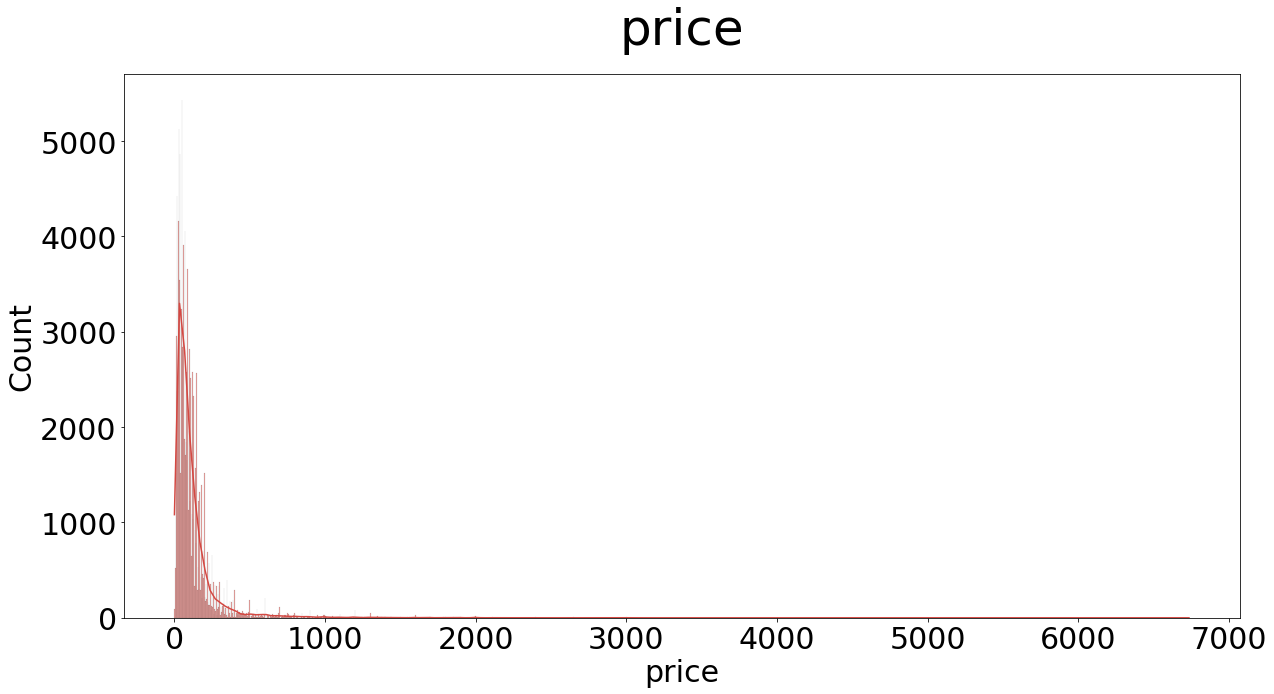

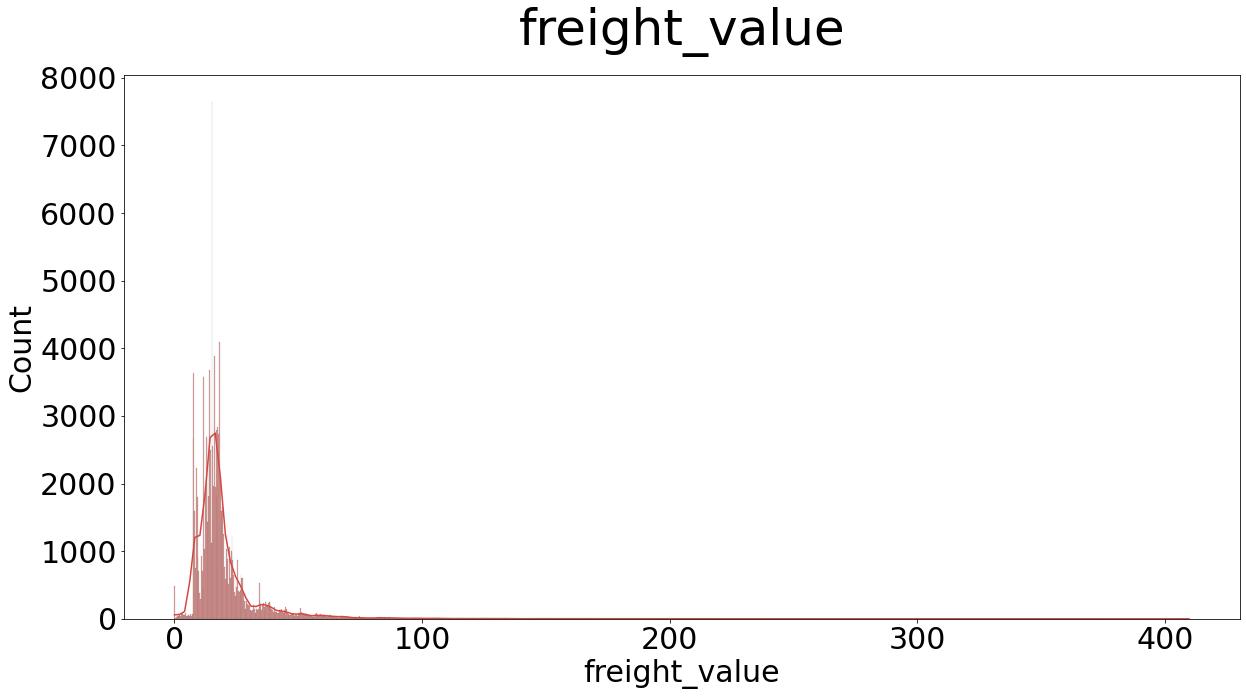

In [22]:
# Plots the float's type features inside order_items_df

for i in order_items_df.select_dtypes(include='float'):

    fig, ax = plt.subplots(figsize=(20, 10))
    sns.histplot(data=order_items_df,
                 x=i,
                 kde = True,
                 color=sns.color_palette('inferno')[3],
                 ax=ax)

    ax.tick_params(labelsize=tick_size)
    ax.set_xlabel('{}'.format(i), fontsize=text_size)
    ax.set_ylabel('Count', fontsize=text_size)
    plt.title('{}'.format(i), fontsize=title_size, pad=30)

    plt.show()

plt.show();


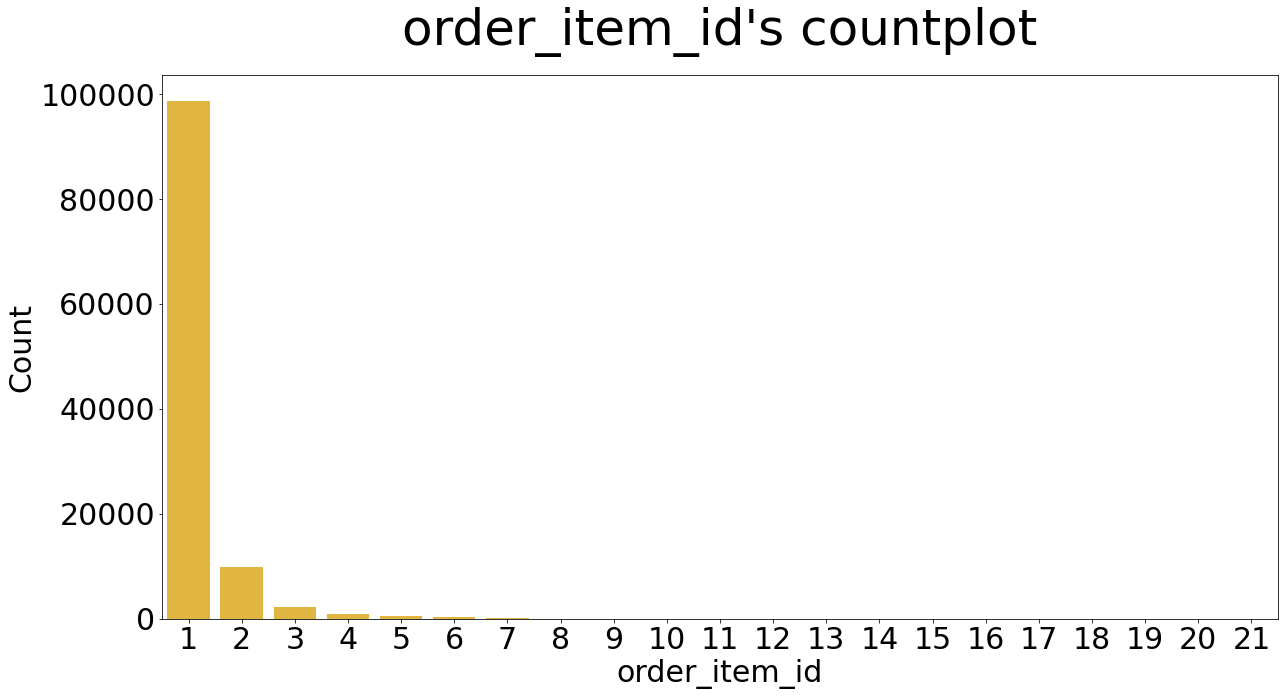

In [23]:
# Countplots order_item_id

fig, ax = plt.subplots(figsize=(20, 10))

sns.countplot(
    data=order_items_df,
    x='order_item_id',
    color=sns.color_palette('inferno')[5],
    ax=ax)

ax.tick_params(labelsize=tick_size)
ax.set_xlabel('order_item_id', fontsize=text_size)
ax.set_ylabel('Count', fontsize=text_size)

plt.title('order_item_id\'s countplot', fontsize=title_size, pad=30)
plt.show();


<h6>Products Dataframe

In [24]:
products_df.shape


(32951, 9)

In [25]:
products_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
products_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [27]:
products_df.nunique()


product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [28]:
# Checks missing values

# No need to investigate the missing values as none of the below features
# will be extensively used later on

return_missing_values_df_bar(products_df, bars = True)


,Missing Values
product_category_name,1.851234
product_name_lenght,1.851234
product_description_lenght,1.851234
product_photos_qty,1.851234
product_weight_g,0.006070
product_length_cm,0.006070
product_height_cm,0.006070
product_width_cm,0.006070


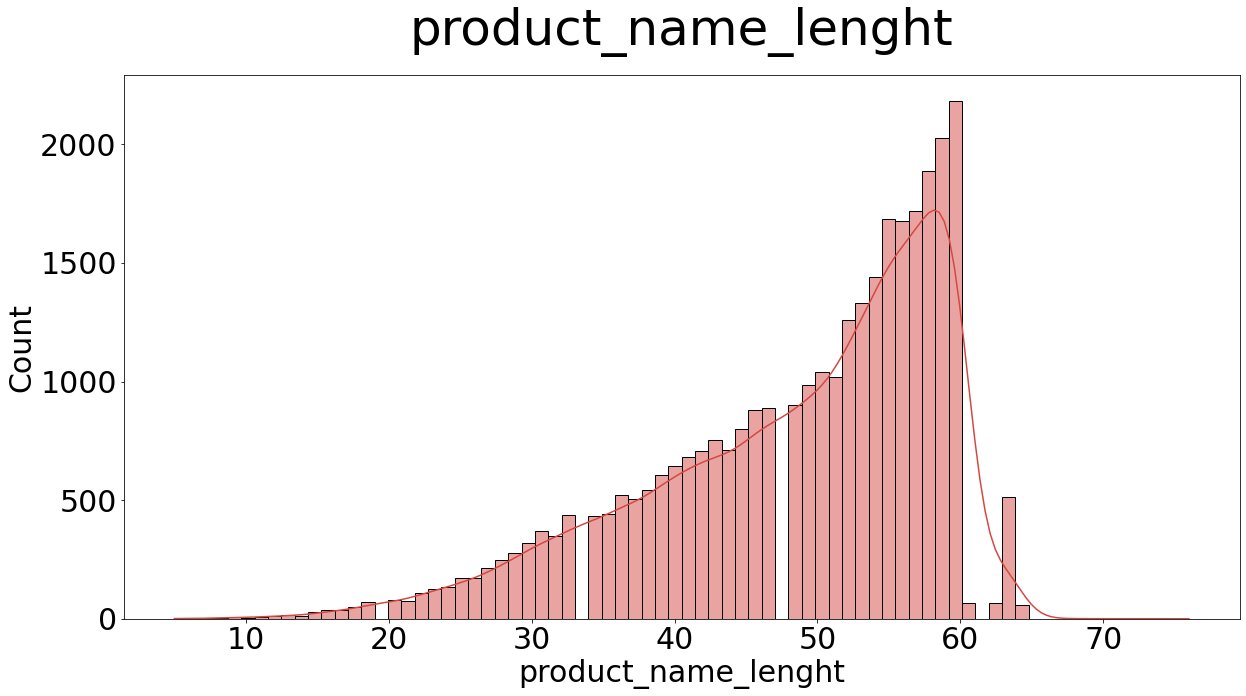

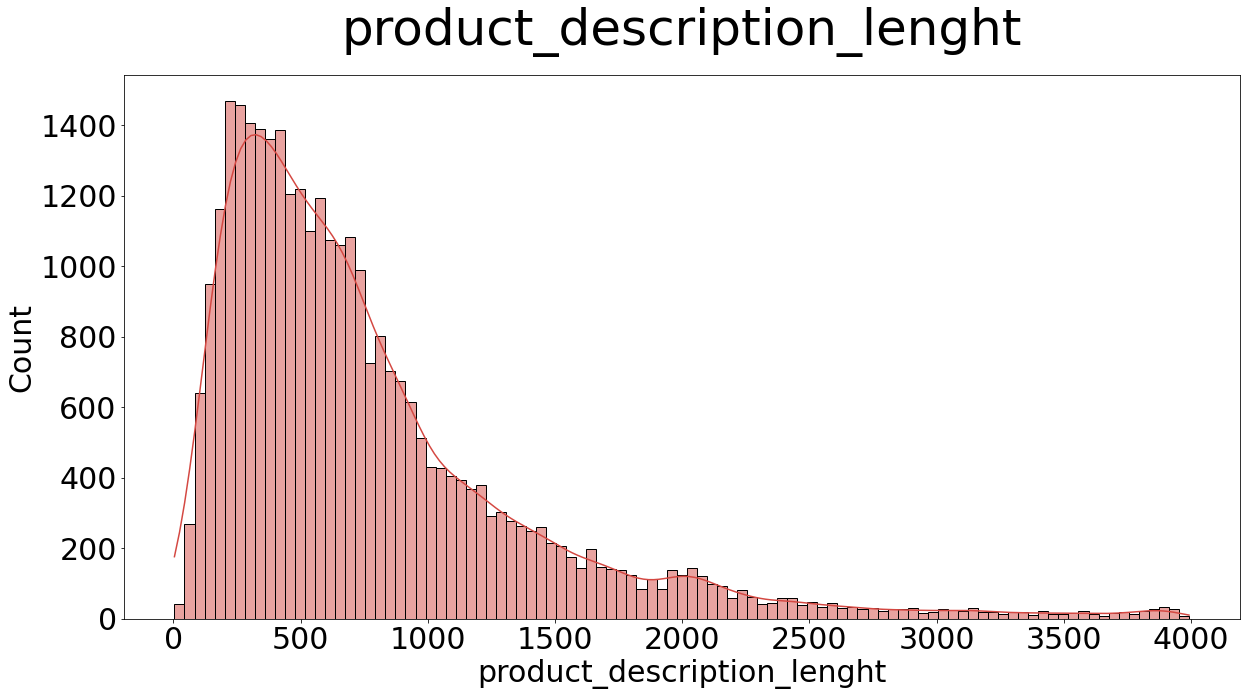

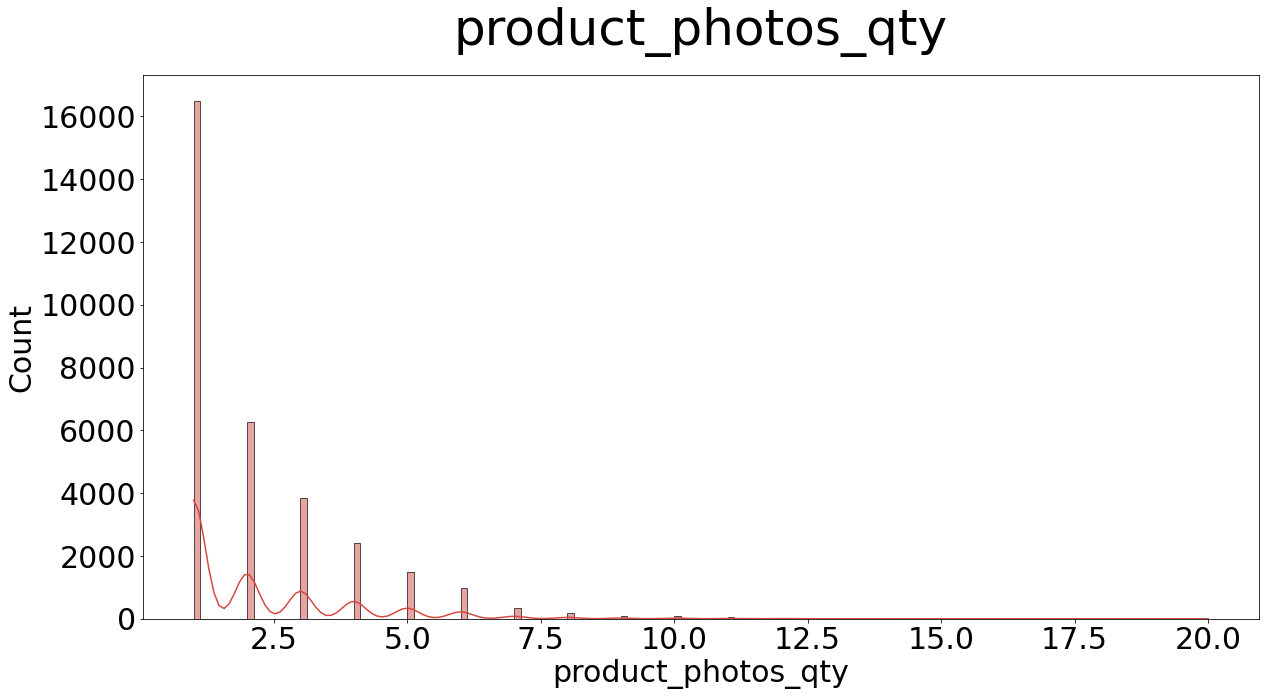

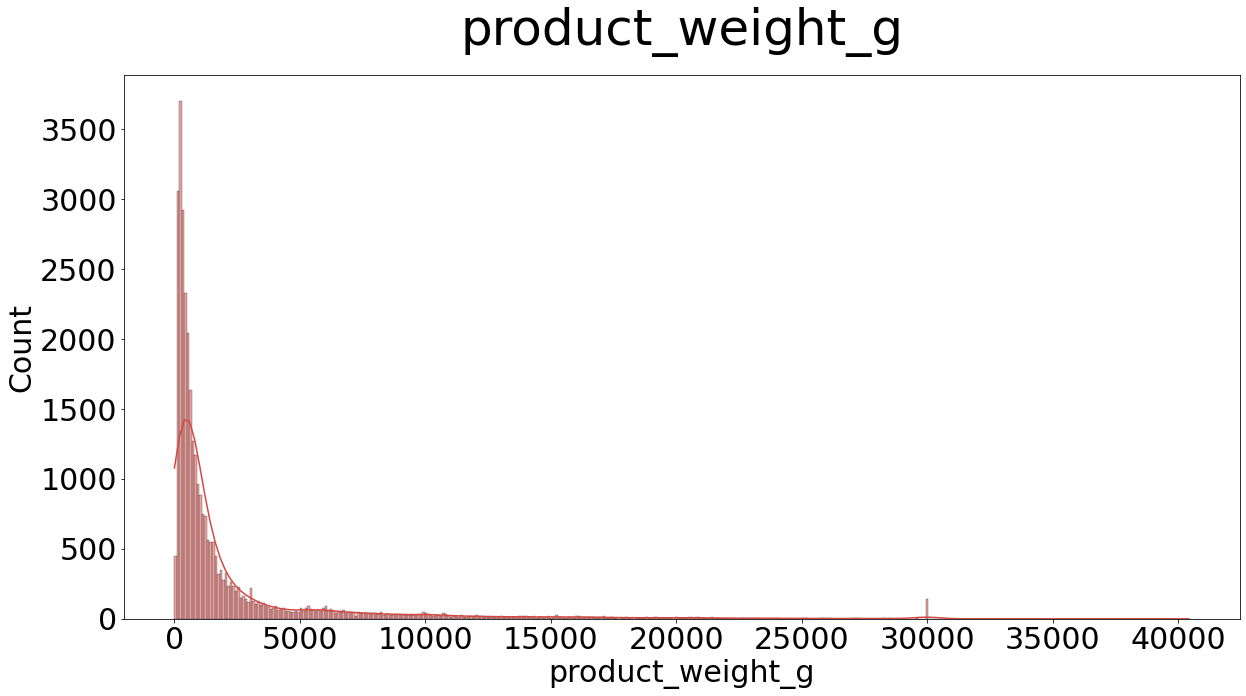

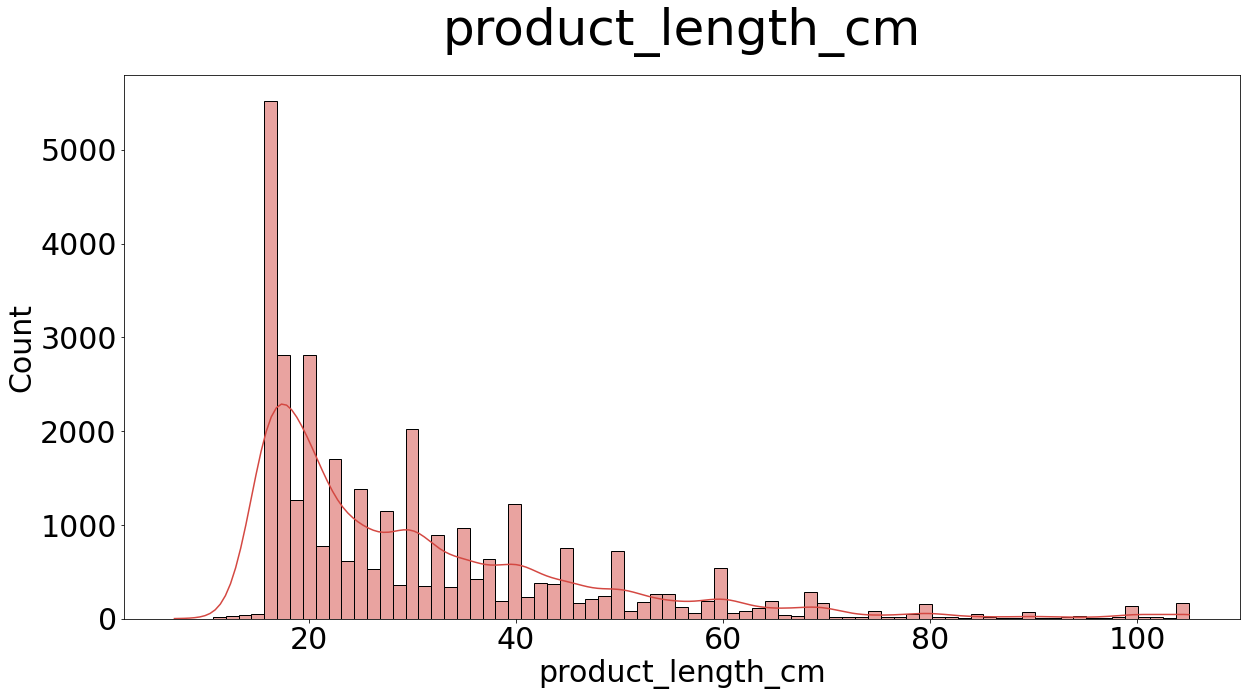

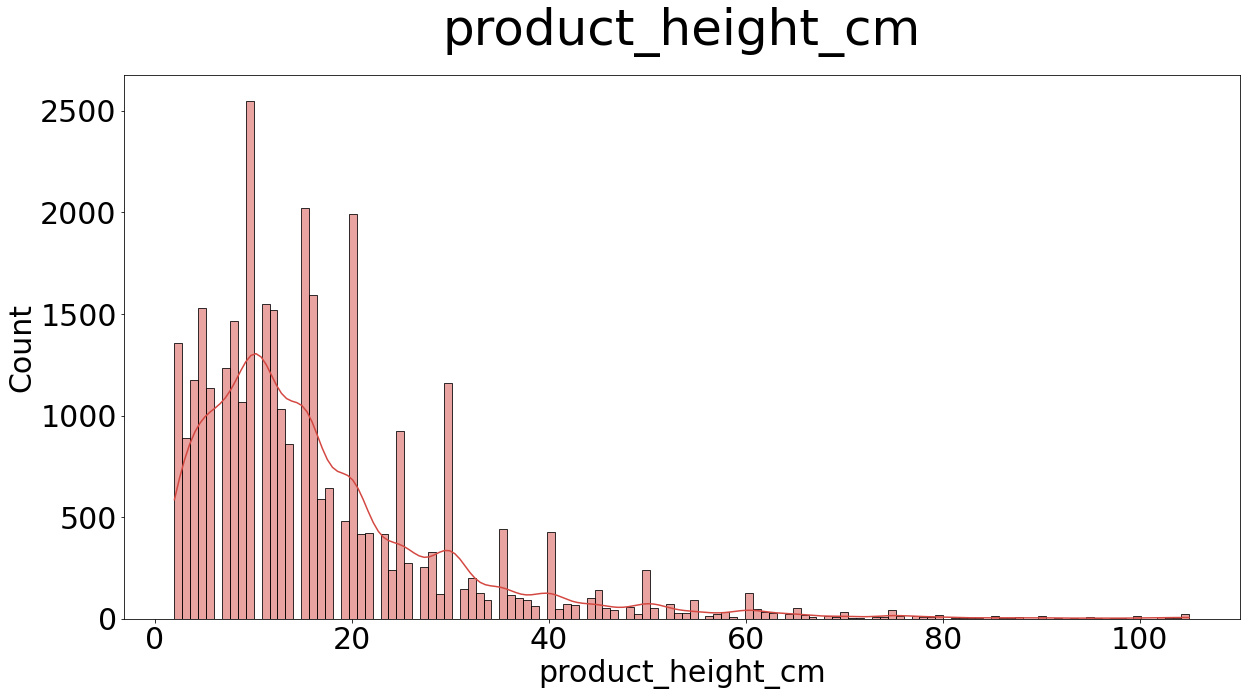

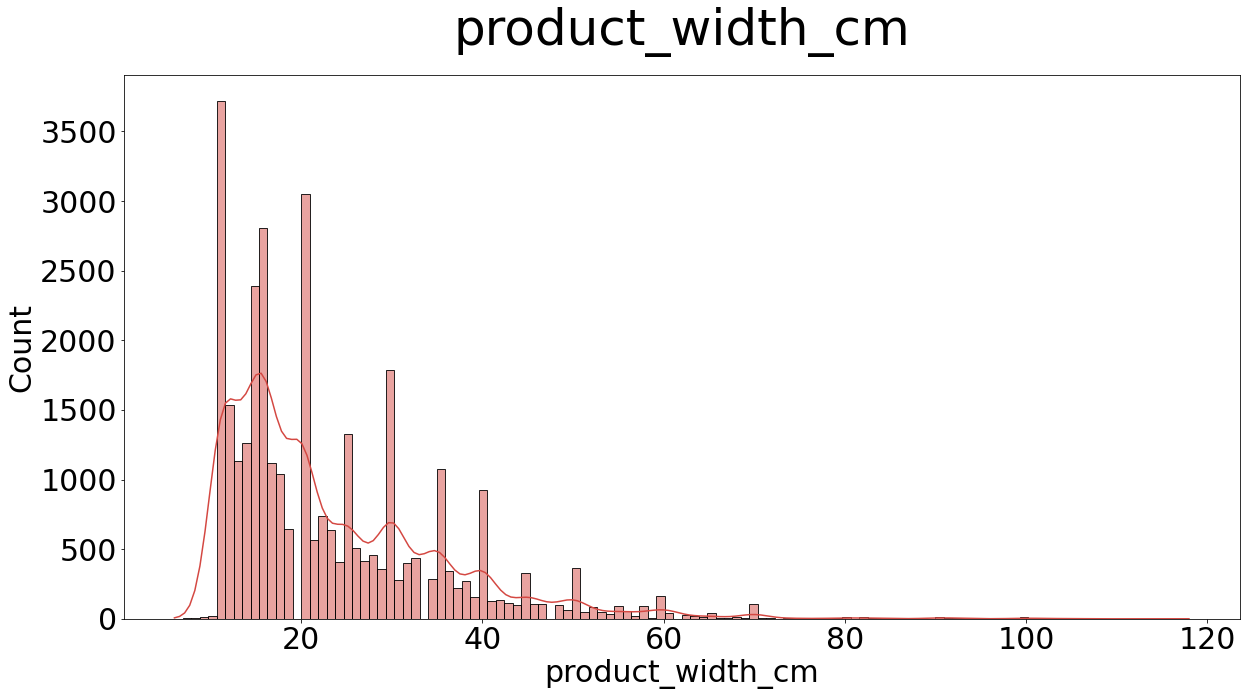

In [29]:
# Plots the float's type features inside products_df

for i in products_df.select_dtypes(include='float'):

    fig, ax = plt.subplots(figsize=(20, 10))
    sns.histplot(data=products_df,
                 x=i,
                 kde = True,
                 color=sns.color_palette('inferno')[3],
                 ax=ax)

    ax.tick_params(labelsize=tick_size)
    ax.set_xlabel('{}'.format(i), fontsize=text_size)
    ax.set_ylabel('Count', fontsize=text_size)
    plt.title('{}'.format(i), fontsize=title_size, pad=30)

    plt.show()

plt.show();


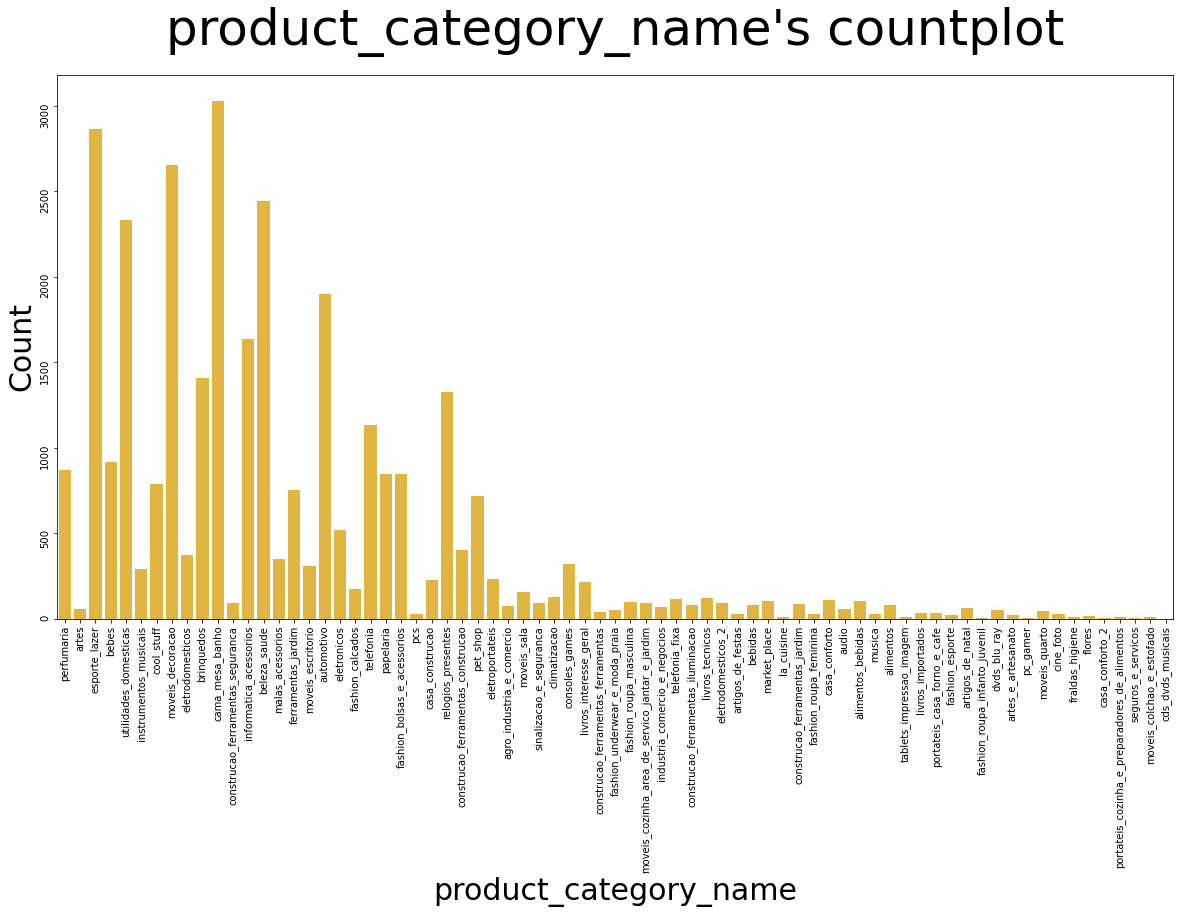

In [30]:
# Countplots product_category_name

fig, ax = plt.subplots(figsize=(20, 10))

sns.countplot(
    data=products_df,
    x='product_category_name',
    color=sns.color_palette('inferno')[5],
    ax=ax)

ax.tick_params(labelsize=10, rotation=90)
ax.set_xlabel('product_category_name', fontsize=text_size)
ax.set_ylabel('Count', fontsize=text_size)

plt.title('product_category_name\'s countplot', fontsize=title_size, pad = 30)
plt.show();


<h6>Seller Dataframe

In [31]:
sellers_df.shape


(3095, 4)

In [32]:
sellers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [33]:
sellers_df.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [34]:
sellers_df.nunique()


seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [35]:
# Checks missing values

return_missing_values_df_bar(sellers_df, bars = True)


,Missing Values


<h6>Payments Dataframe

In [36]:
payments_df.shape


(103886, 5)

In [37]:
payments_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [38]:
payments_df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [39]:
payments_df.nunique()


order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [40]:
# Checks missing values

return_missing_values_df_bar(payments_df, bars = True)


,Missing Values


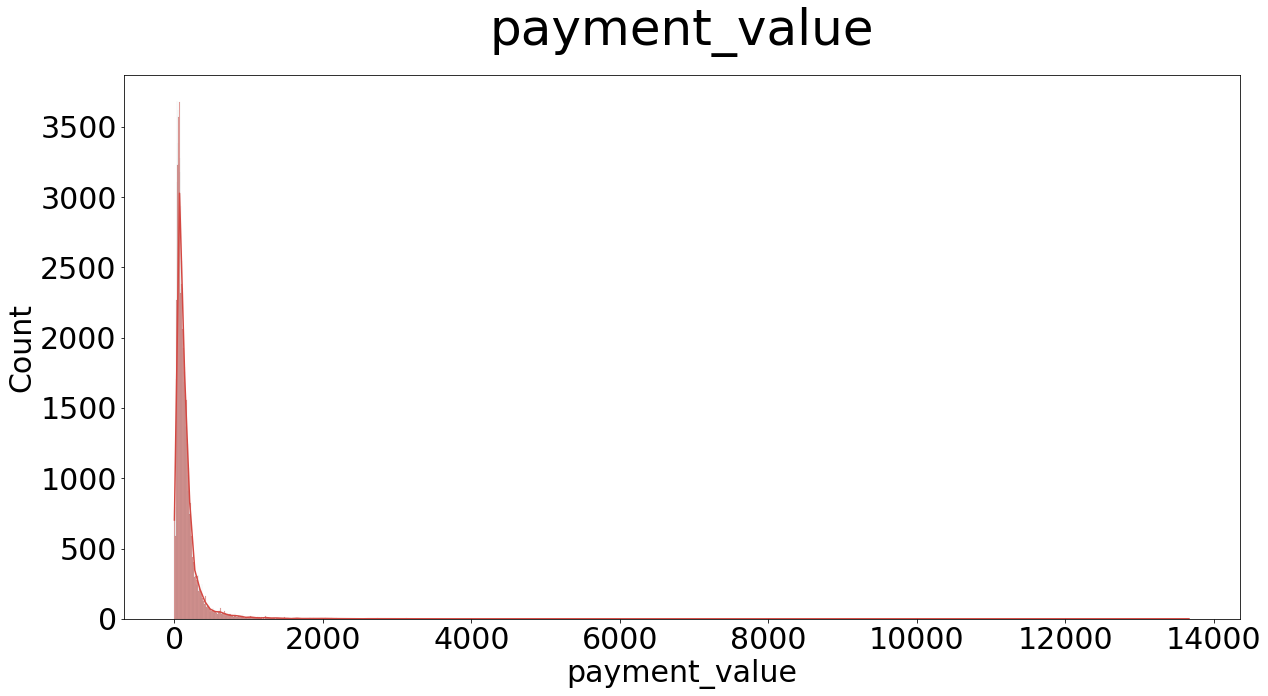

In [41]:
# Plots the float's type features inside payments_df

for i in payments_df.select_dtypes(include='float'):

    fig, ax = plt.subplots(figsize=(20, 10))
    sns.histplot(data=payments_df,
                 x=i,
                 kde = True,
                 color=sns.color_palette('inferno')[3],
                 ax=ax)

    ax.tick_params(labelsize=tick_size)
    ax.set_xlabel('{}'.format(i), fontsize=text_size)
    ax.set_ylabel('Count', fontsize=text_size)
    plt.title('{}'.format(i), fontsize=title_size, pad=30)

    plt.show()

plt.show();


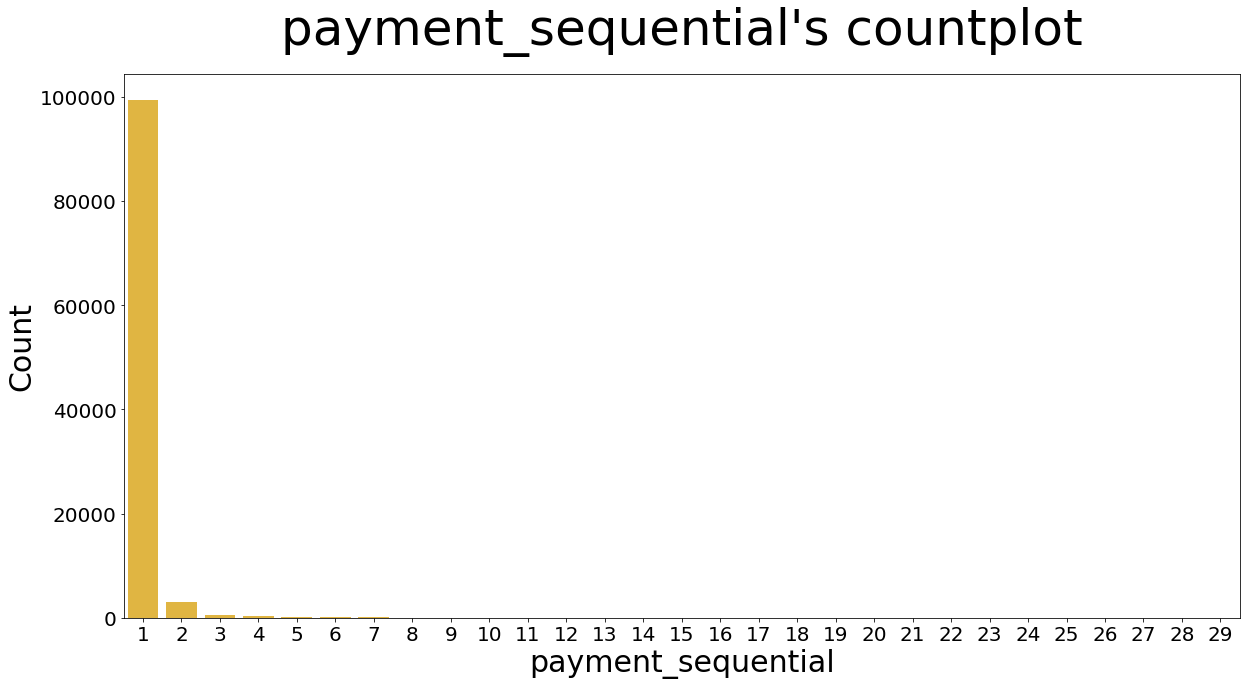

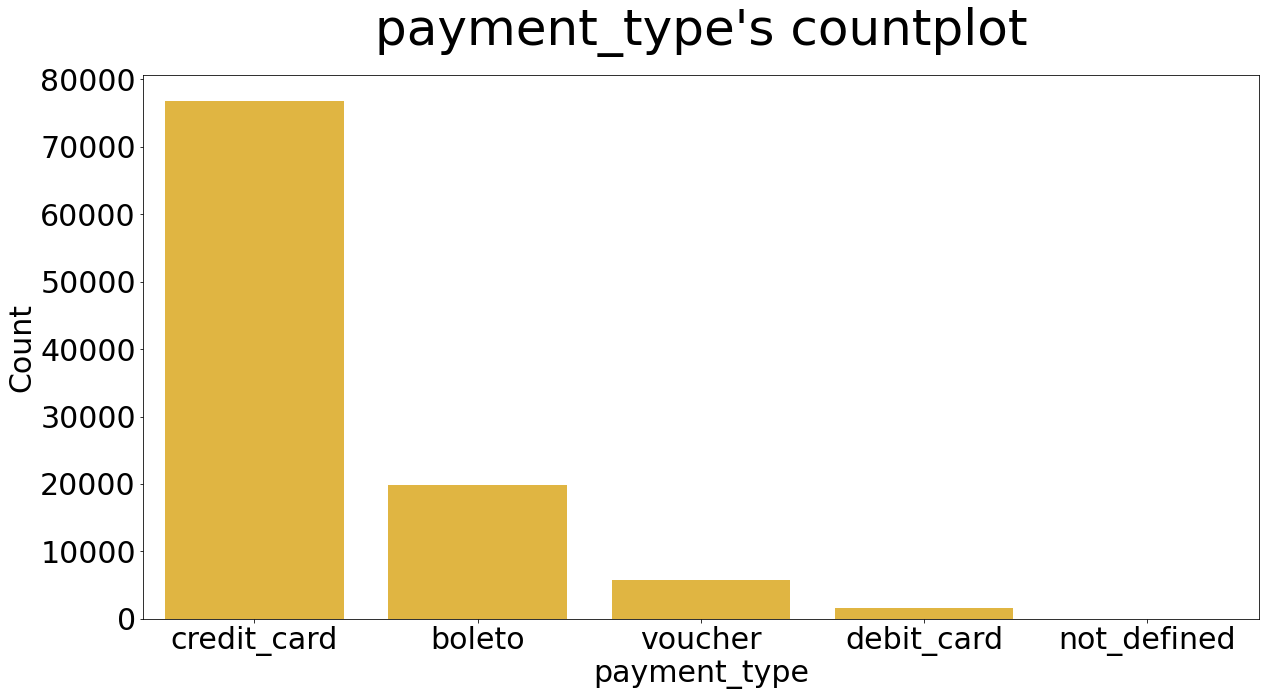

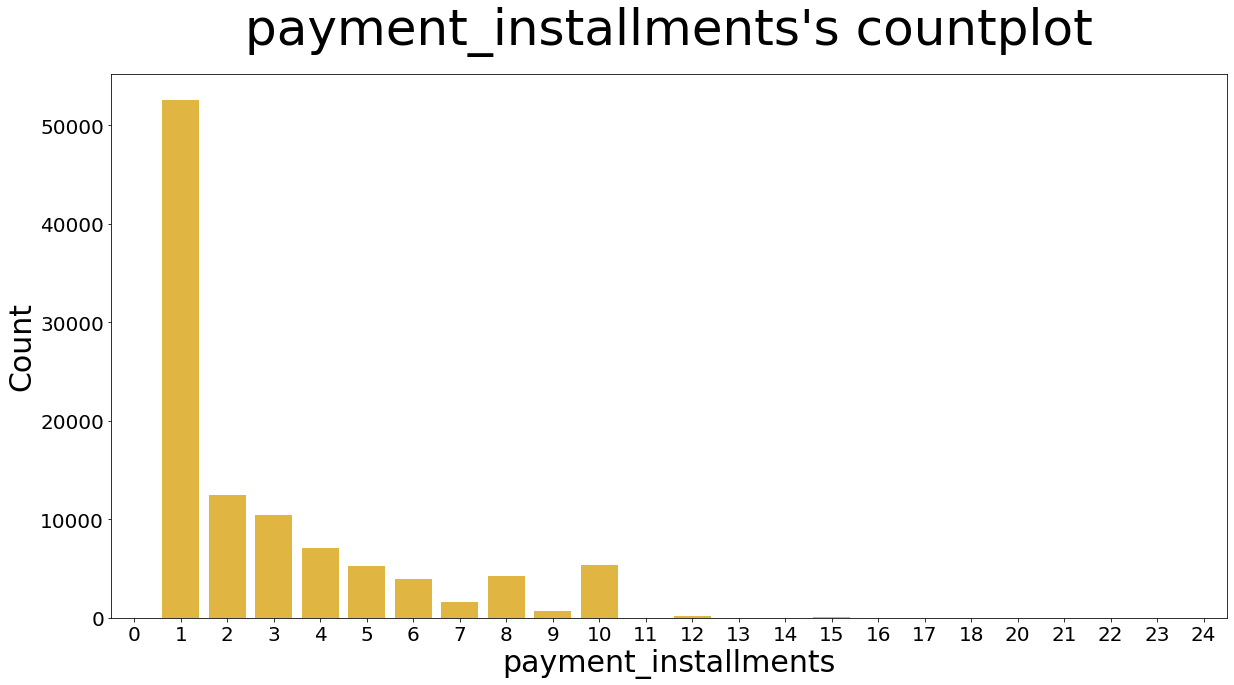

In [42]:
# Countplots interesting ordinal and categorical features

for i in [i for i in payments_df.select_dtypes(exclude='float').columns
          if i not in ['order_id']]:

    fig, ax = plt.subplots(figsize=(20, 10))

    sns.countplot(
        data=payments_df,
        x=i,
        color=sns.color_palette('inferno')[5],
        ax=ax)

    if i in ['payment_type']:
        ax.tick_params(labelsize=30)
    else:
        ax.tick_params(labelsize=20)

    ax.set_xlabel(i, fontsize=text_size)
    ax.set_ylabel('Count', fontsize=text_size)

    plt.title('{}\'s countplot'.format(i), fontsize=title_size, pad=30)
    plt.show()

plt.show();


<h6>Reviews Dataframe

In [43]:
order_reviews_df.shape


(99224, 7)

In [44]:
order_reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [45]:
order_reviews_df.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [46]:
order_reviews_df.nunique()


review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [47]:
# Checks missing values

return_missing_values_df_bar(order_reviews_df, bars = True)


,Missing Values
review_comment_title,88.341530
review_comment_message,58.702532


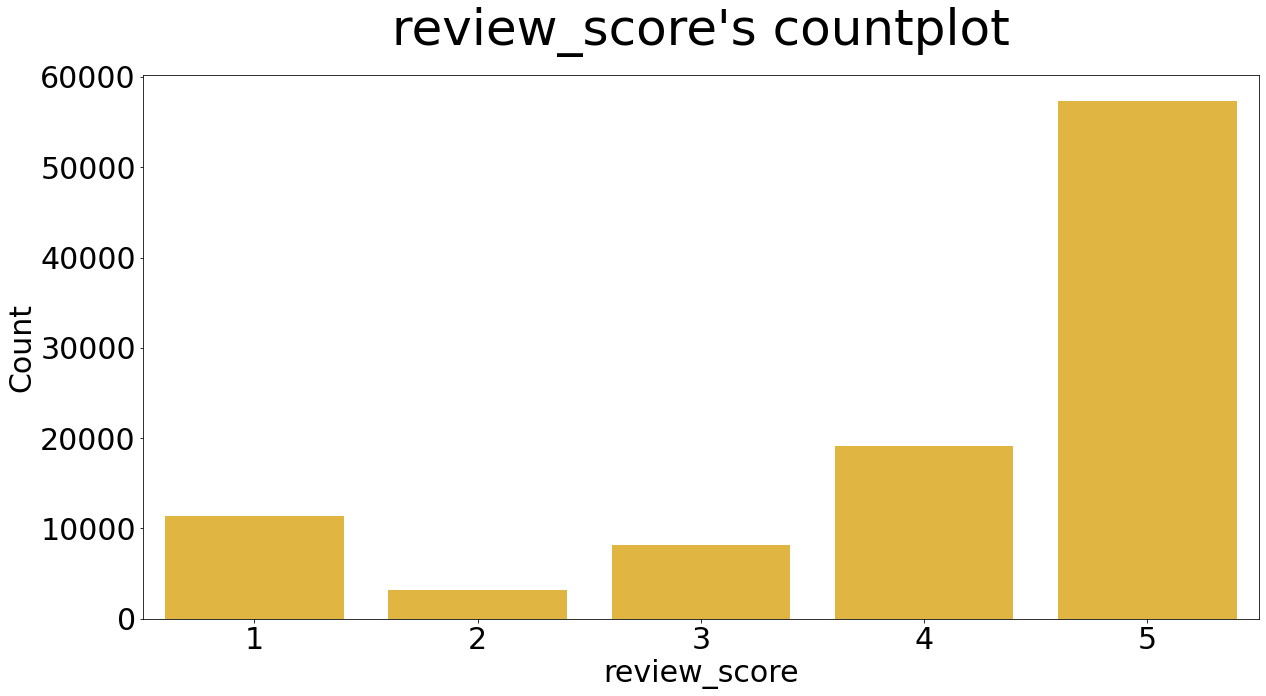

In [48]:
# Countplots review_score

fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(
    data=order_reviews_df,
    x='review_score',
    color=sns.color_palette('inferno')[5],
    ax=ax)

ax.tick_params(labelsize=30)
ax.set_xlabel('review_score', fontsize=text_size)
ax.set_ylabel('Count', fontsize=text_size)

plt.title('{}\'s countplot'.format('review_score'),
          fontsize=title_size, pad=30)

plt.show();


<h6>Geolocalistaion Dataframe

In [49]:
geolocalisation_df.shape


(1000163, 5)

In [50]:
geolocalisation_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [51]:
geolocalisation_df.head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [52]:
# NB :
# geolocation_lat and _lng .unique() > geolocation_zip_code_prefix .unique()

geolocalisation_df.nunique()


geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

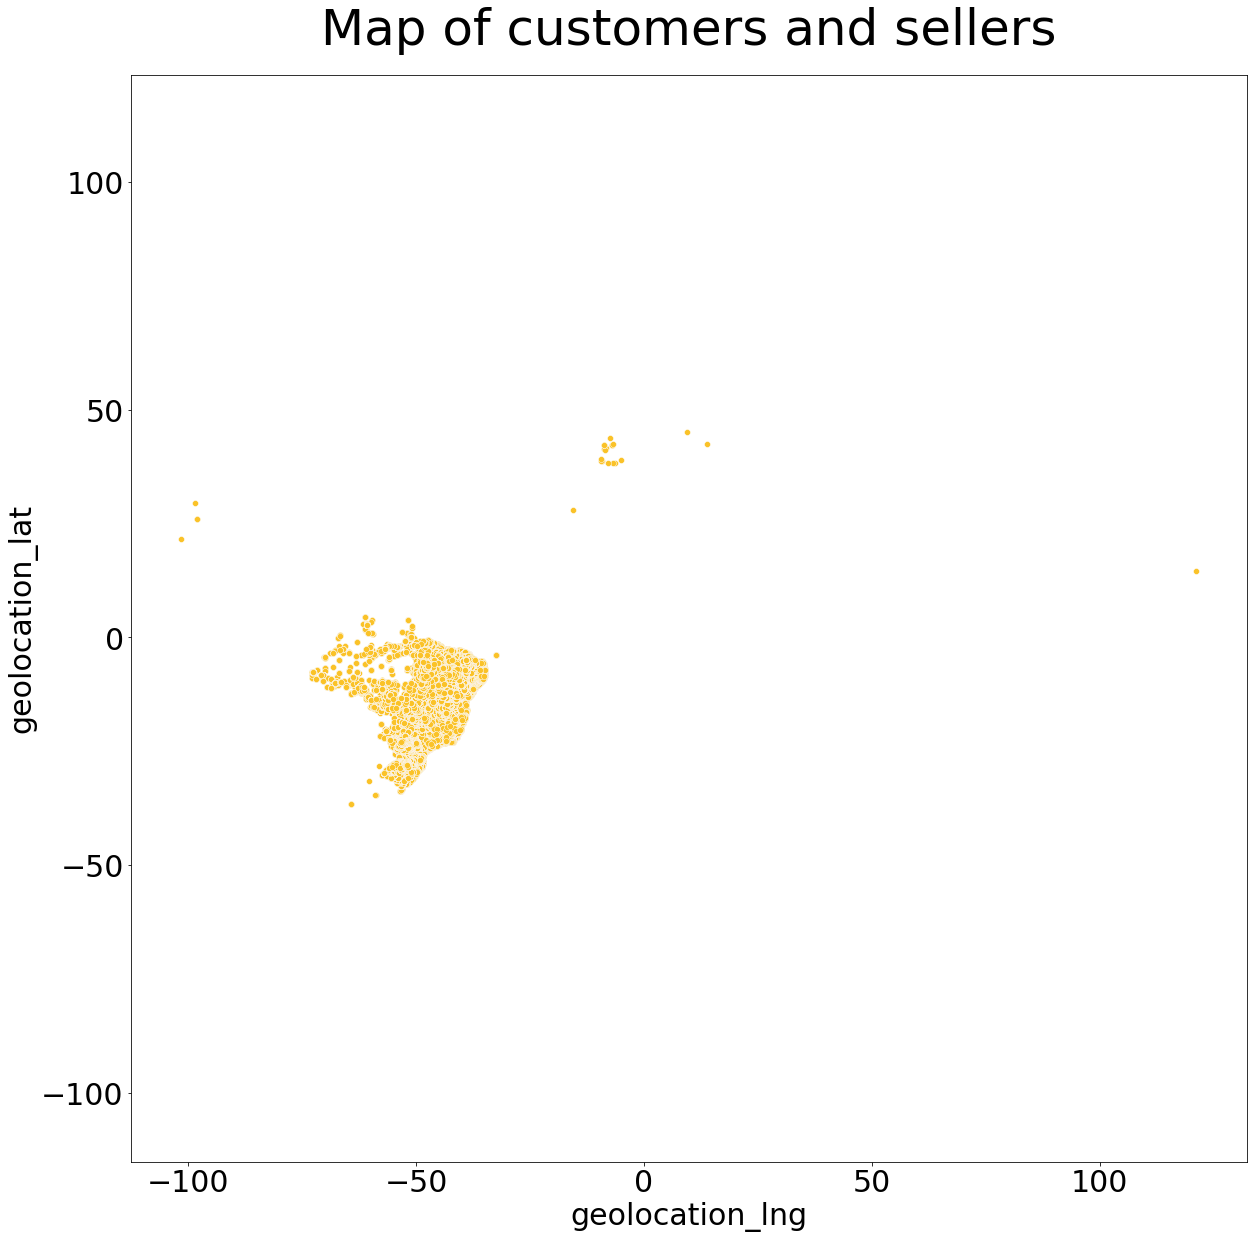

In [53]:
# Plots latitudes against longitudes

fig, ax = plt.subplots(figsize=(20, 20))

sns.scatterplot(
    data=geolocalisation_df,
    x='geolocation_lng',
    y='geolocation_lat',
    ax=ax,
    color=sns.color_palette('inferno')[5])

ax.tick_params(labelsize=30)
ax.set_xlabel('geolocation_lng', fontsize=text_size)
ax.set_ylabel('geolocation_lat', fontsize=text_size)

plt.title('{}'.format('Map of customers and sellers'),
          fontsize=title_size, pad=30)
plt.axis('equal')
plt.show();


In [54]:
# Checks missing values

return_missing_values_df_bar(geolocalisation_df, bars = True)


,Missing Values


<center><h6>Merge duplicational effect exposition

    Left joining all the dataframes cause samples to be duplicated.
    The following cells provide examples of such cases :
    (The merge is operated on order_id, the orders passed)

In [55]:
# Reminder : 99441 unique order_id

order_df['order_id'].nunique()

# Therefore, the goal is to stay at 99441 after the merge

order_df.shape


99441

(99441, 8)

In [56]:
# Merges order_items_df on order_id

central_df = pd.merge(order_df, order_items_df, how='left')

# There are still 99441 unique order_id(s)

central_df['order_id'].nunique()

# But with 113425 rows (!= 99441)

central_df.shape[0]


99441

113425

In [57]:
# The duplication is due to order_item_id which means the number of items
# in the order

# Displays such a case

central_df[
    central_df['order_id'] == 'e6ce16cb79ec1d90b1da9085a6118aeb']


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,1.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.0,30.53
11,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,2.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.0,30.53


In [58]:
# Same demonstration with reviews :

lambda_df = pd.merge(central_df, order_reviews_df, how='left')

# The duplication is apparently caused by the fact one can change its review

# Displays a case where for the same product, with the same order_id_item one
# have given two different review_comment_message

lambda_df[
    lambda_df['order_id'] == 'ac7a92560a9e99f0a0ab4988102f491b']


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
458,ac7a92560a9e99f0a0ab4988102f491b,6abf781c5304890987047e9aa239caa8,delivered,2018-03-04 15:58:09,2018-03-04 16:10:35,2018-03-06 17:14:59,2018-03-22 23:44:33,2018-03-23 00:00:00,1.0,4ab7490d3e55de79cae5fc88e1657276,b2479f944e1b90cf8a5de1bbfde284d6,2018-03-08 16:10:35,89.99,17.88,1ce9388b1a3ad76f5f1a64f208a90fce,1.0,NaN,O prazo era até dia 23/03 e até o momento não ...,2018-03-25 00:00:00,2018-03-25 21:40:11
459,ac7a92560a9e99f0a0ab4988102f491b,6abf781c5304890987047e9aa239caa8,delivered,2018-03-04 15:58:09,2018-03-04 16:10:35,2018-03-06 17:14:59,2018-03-22 23:44:33,2018-03-23 00:00:00,1.0,4ab7490d3e55de79cae5fc88e1657276,b2479f944e1b90cf8a5de1bbfde284d6,2018-03-08 16:10:35,89.99,17.88,5ac791169055b4994a395a442e3956f6,1.0,NaN,"Comprei pensando que ia vir conforme a foto, v...",2018-03-23 00:00:00,2018-03-24 12:57:14


In [59]:
# NB : there is one review per basket

# Retrieves the ids of orders with a basket (orders_items > 1)

above_one_order_item_idx = \
    lambda_df[lambda_df['order_item_id'] > 1]['order_id'].values

# Creates the above relative dataframe

above_one_order_item_df = \
    lambda_df[lambda_df['order_id'].isin(above_one_order_item_idx)]

# Checks duplicates of order_id against review_id

above_one_order_item_df[['order_id',
                         'review_id']]\
                        .duplicated(keep = False)\
                        .value_counts()


True    23979
dtype: int64

In [60]:
# NB : there is one review per basket even if the seller isn't the same

# Shows that all baskets doesn't come from the same sellers

above_one_order_item_df[['order_id',
                         'review_id',
                         'seller_id']]\
                        .duplicated(keep = False)\
                        .value_counts()

# However, the reviews (score, message, title) are the same. An example :

lambda_df[
    lambda_df['order_id'] == 'acce194856392f074dbf9dada14d8d82']


True     21667
False     2312
dtype: int64

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
27,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18 00:00:00,1.0,d70f38e7f79c630f8ea00c993897042c,977f9f63dd360c2a32ece2f93ad6d306,2018-06-13 00:35:10,90.9,48.64,2d4303fd561eb4ab51c87faa6598dc10,1.0,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17 00:00:00,2018-06-20 11:38:22
28,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18 00:00:00,2.0,9451e630d725c4bb7a5a206b48b99486,d673a59aac7a70d8b01e6902bf090a11,2018-06-13 00:35:10,39.5,48.64,2d4303fd561eb4ab51c87faa6598dc10,1.0,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17 00:00:00,2018-06-20 11:38:22


In [61]:
# Same demonstration with payment :

lambda_df = pd.merge(central_df, payments_df, how='left')

# The duplication is due to payment_sequential and payment_type, this could be
# also due to payment_installments

lambda_df[
    lambda_df['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59


In [62]:
# Same demonstration with geolocalisation :

lambda_df = pd.merge(pd.merge(central_df, customer_df, how='left'),
                     geolocalisation_df,
                     left_on='customer_zip_code_prefix',
                     right_on='geolocation_zip_code_prefix',
                     how='left')

# The duplication is due to zip_code_prefix as there is one for several
# latitudes and longitudes. An example :

lambda_df[
    lambda_df['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.580054,-46.586673,sao paulo,SP
5,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP
6,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
7,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576281,-46.587276,sao paulo,SP
8,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.573954,-46.587331,sao paulo,SP
9,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.579628,-46.586714,sao paulo,SP


In [63]:
# customer_df, products_df, sellers_df don't create duplications in rows

pd.merge(central_df, customer_df, how='left').shape[0] == central_df.shape[0]
pd.merge(central_df, products_df, how='left').shape[0] == central_df.shape[0]
pd.merge(central_df, sellers_df, how='left').shape[0] == central_df.shape[0]


True

True

True

<center><h6>Merge duplicational effect resolution

In [64]:
# Order Item Dataframe

# Retreives the maximum values of order_item_id per customer and commits
# them in a dataframe

order_items_id_reworked = \
    order_items_df.groupby('order_id')['order_item_id'].max().reset_index()

# Displays the head of the created dataframe

order_items_id_reworked.head()

# display the number of unique values in the created dataframe

order_items_id_reworked.nunique()

# NB : order_item_id 17 != 21 is caused by the fact that the maximum make
# some values disappear as x existed but never was a maximum

# Left merges max_order_items_id_df∩order_items_df

order_items_id_reworked = \
    pd.merge(order_items_id_reworked, order_items_df, how='left')\
      .rename({'order_item_id': 'order_item_id_max'}, axis=1)

# Displays the merged dataframe

order_items_id_reworked.head()

# Displays the number of orders in the df

print(str(order_items_id_reworked['order_id'].duplicated().sum()),
      'order_id duplicated')


,order_id,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


order_id         98666
order_item_id       17
dtype: int64

,order_id,order_item_id_max,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


0 order_id duplicated


In [65]:
# Reviews Dataframe

# Creates a copy of order_reviews_df

order_reviews_df_copy = order_reviews_df.copy()

# Converts review_answer_timestamp into a datetime type

order_reviews_df_copy['review_answer_timestamp'] = \
    pd.to_datetime(order_reviews_df_copy['review_answer_timestamp'])

# Does the same conversion on order_reviews_df (for further merge)

order_reviews_df['review_answer_timestamp'] = \
    pd.to_datetime(order_reviews_df['review_answer_timestamp'])

# When several have been made for a unique order:
# Computes the last time a comment have been made;
# Computes the mean of review_score (and the max for demonstration purpose)

order_reviews_df_copy = \
    order_reviews_df_copy.groupby('order_id')\
                         .agg({'review_answer_timestamp': ['max']})\
                         .reset_index()

# Computes the names of created features

order_reviews_df_copy.columns = \
    order_reviews_df_copy.columns.get_level_values(0)[0:1]\
    .append(order_reviews_df_copy.columns[1:].get_level_values(0)
            + '_'
            + order_reviews_df_copy.columns[1:].get_level_values(1))

# Displays effectued transformations

order_reviews_df_copy.head()


,order_id,review_answer_timestamp_max
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-03-03 10:54:59


In [66]:
# Creates a order_reviews_df like dataframe with the last reviews
# only per orders

# NB : if a basket has the same review, the cell below shows that two orders
# can have the same review (most likely if passed by the same customer
# the same day)

order_reviews_df_reworked = \
    pd.merge(order_reviews_df_copy,
             order_reviews_df,
             how='left',
             left_on=['order_id', 'review_answer_timestamp_max'],
             right_on=['order_id', 'review_answer_timestamp'])\
      .rename({'review_answer_timestamp_max': 'last_review_answer_timestamp'},
              axis=1)

# Displays the created dataframe

order_reviews_df_reworked.head()

# No orders are duplicated in this dataframe

print(str(order_reviews_df_reworked['order_id'].duplicated().sum())
      + ' order_id duplicated')


,order_id,last_review_answer_timestamp,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-22 10:57:03,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,2017-05-15 11:34:13,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,2018-01-23 16:06:31,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,2018-08-15 16:39:01,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-03-03 10:54:59,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


0 order_id duplicated


In [67]:
# This cell is for investigation only, no change is commited in it

# One might find duplicates of review_id

print('Two orders can have the same review :')

order_reviews_df_reworked['review_id'].duplicated().value_counts()

# This is the result of three possibilities :

# 1. The customer have passed different orders the same day
# 2. The review_id is also related to a not delivered order that will be droped
# later on
# 3. There have been some disputes between customers and olist causing most
# likely some duplicational inputs for the same order (4 orders are concerned)

# The following part brings evidence of the above notice :

# Retrieves duplicated reviews indexes

reviews_duplicated_idx = \
    order_reviews_df[
        order_reviews_df['review_id'].duplicated()]['review_id'].values

# Creates a dataframe that allows investigation in between orders,
# customers and reviews

# NB : The merge for reviews is made on order_reviews_df_reworked rather than
# on order_reviews_df for the sake of easiness, efficency and clarity

gamma_df = \
    pd.merge(pd.merge(order_df, customer_df),
             order_reviews_df_reworked, how='left')

# Reduces the above dataframe to the duplicated reviews

scoped_gamma_df = \
    gamma_df[gamma_df['review_id'].isin(reviews_duplicated_idx)].copy()

# Removes the not delivered samples as they won't be used later on

scoped_gamma_df_delivered = \
    scoped_gamma_df[
        scoped_gamma_df['order_status'] == 'delivered'].copy()

# Creates a order_purchase_timestamp_2 features which focuses on the day
# of the order purshase

scoped_gamma_df_delivered['order_purchase_timestamp_2'] = \
    pd.to_datetime(scoped_gamma_df_delivered['order_purchase_timestamp'])\
      .dt.strftime('%Y-%m-%d')

# Creates a DataFrame where the purshases passed by the same customer on the
# same day aren't kept

day_scoped_gamma_df_delivered = \
    scoped_gamma_df_delivered[
        ~scoped_gamma_df_delivered[['customer_unique_id',
                                    'order_purchase_timestamp_2']]
        .duplicated(keep = False)].copy()

# Displays the remainings duplicated review_id after removing non delivered
# and same day passed orders

# NB : the remainings samples seems to be return purchase cases e.g :
# 'Devolução', 'solicitar a troca' in 'review_comment_title',
# 'review_comment_message'

print('Remainings duplicated review_id after removing non delivered'
      + ' and same day passed orders:')

day_scoped_gamma_df_delivered[
    day_scoped_gamma_df_delivered['review_id']
    .duplicated(keep=False)].sort_values(by='review_id')


Two orders can have the same review :


False    98095
True       578
Name: review_id, dtype: int64

Remainings duplicated review_id after removing non delivered and same day passed orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,last_review_answer_timestamp,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_purchase_timestamp_2
44117,82fd1196a459f594fb1d66e667fc74c4,ef9b9b1cb4921466d4190e3116fe248e,delivered,2018-04-10 21:09:18,2018-04-11 09:30:27,2018-04-17 16:04:51,2018-04-21 00:51:34,2018-05-02 00:00:00,c0394cfa96258a94e368499f919a3ba6,4703,sao paulo,SP,2018-04-23 14:03:47,3d163199153af414059e6cfabc09a0fd,1.0,NaN,Depois de receber o produto avariado e solicit...,2018-04-21 00:00:00,2018-04-23 14:03:47,2018-04-10
87397,ca263afd88a8a1200605adbd4b63cd7d,2f6014fe90cb09655c6f5d9259381c8e,delivered,2018-01-12 18:17:53,2018-01-12 18:48:27,2018-01-16 17:34:52,2018-01-22 18:33:16,2018-02-02 00:00:00,c0394cfa96258a94e368499f919a3ba6,4703,sao paulo,SP,2018-04-23 14:03:47,3d163199153af414059e6cfabc09a0fd,1.0,NaN,Depois de receber o produto avariado e solicit...,2018-04-21 00:00:00,2018-04-23 14:03:47,2018-01-12
55842,df52ca7830380e7d8f7292e99434eea7,a1902b753d5eeb9831f1d3f89a13fba8,delivered,2018-05-26 11:51:22,2018-05-28 11:03:54,2018-05-28 14:03:00,2018-06-08 10:14:50,2018-06-12 00:00:00,ff03923ad1eb9e32304deb7f9b2a45c9,18703,avare,SP,2018-06-16 03:07:32,ac1c3843ce235505ac4e69b5f343afc7,3.0,NaN,NaN,2018-06-09 00:00:00,2018-06-16 03:07:32,2018-05-26
94760,1d87599144fe1573be8611bf9f5d5de9,03b400e08714b00279dfdc1356f6f03f,delivered,2018-04-23 21:49:49,2018-04-24 18:37:41,2018-04-24 23:21:56,2018-04-25 23:48:48,2018-05-08 00:00:00,ff03923ad1eb9e32304deb7f9b2a45c9,18703,avare,SP,2018-06-16 03:07:32,ac1c3843ce235505ac4e69b5f343afc7,3.0,NaN,NaN,2018-06-09 00:00:00,2018-06-16 03:07:32,2018-04-23
10362,40940dc8bce0d8f65258a5d2d293038b,b697190995396d442349aa728da58c9a,delivered,2018-03-01 02:35:23,2018-03-01 02:55:23,2018-03-14 17:06:37,2018-04-03 23:31:02,2018-04-04 00:00:00,df5ff0c899dd19ed568e3e0f716cbe20,22713,rio de janeiro,RJ,2018-05-20 18:13:54,ce1c2770d9a0f9e3742fc266bd52f4ff,4.0,Devolução complicada.,"Além do produto chegar errado, a devolução é f...",2018-05-17 00:00:00,2018-05-20 18:13:54,2018-03-01
89829,96f5be02bc9ffc589f3274500a64a7e2,5396ffb28b2d1cbea8d6ec46201f06ba,delivered,2018-04-23 14:31:55,2018-04-27 16:11:21,2018-05-11 12:26:00,2018-05-16 18:19:00,2018-06-01 00:00:00,df5ff0c899dd19ed568e3e0f716cbe20,22713,rio de janeiro,RJ,2018-05-20 18:13:54,ce1c2770d9a0f9e3742fc266bd52f4ff,4.0,Devolução complicada.,"Além do produto chegar errado, a devolução é f...",2018-05-17 00:00:00,2018-05-20 18:13:54,2018-04-23
32412,ebc94658c583ab37ad4f8e9091c4bef2,92dbb92ac5c6b1822c3aa951d33e61d0,delivered,2018-04-14 08:22:43,2018-04-24 18:04:50,2018-04-26 15:57:00,2018-04-30 20:39:01,2018-05-03 00:00:00,5c96017028584678dd28c139566b87c0,34012,nova lima,MG,2018-04-02 00:32:35,d25026282e14fc531f0711246e121cc2,2.0,NaN,"Foi entrgue dentro do prazo, porem nao foi ent...",2018-03-30 00:00:00,2018-04-02 00:32:35,2018-04-14
50734,48d94e7406a8d5cbf7505590d86ff0ea,fef694d6112e17a6f7516f6c9852a15c,delivered,2018-03-22 11:30:05,2018-03-24 02:10:52,2018-03-27 04:18:51,2018-03-29 15:53:09,2018-04-04 00:00:00,5c96017028584678dd28c139566b87c0,34012,nova lima,MG,2018-04-02 00:32:35,d25026282e14fc531f0711246e121cc2,2.0,NaN,"Foi entrgue dentro do prazo, porem nao foi ent...",2018-03-30 00:00:00,2018-04-02 00:32:35,2018-03-22


In [68]:
# Payments Dataframe

# Creates a copy of payments_df

payments_df_copy = payments_df.copy()

# Aggregates the payment values per orders

payments_df_reworked = \
    payments_df_copy.groupby('order_id')\
                    .agg({'payment_value': ['sum'],
                          'payment_type': [pd.Series.mode],
                          'payment_installments': ['max'],
                          'payment_sequential': ['max']})\
                    .reset_index()

# Compute the names of created features

payments_df_reworked.columns = \
    payments_df_reworked.columns.get_level_values(0)[0:1]\
    .append(payments_df_reworked.columns[1:].get_level_values(0)
            + '_'
            + payments_df_reworked.columns[1:].get_level_values(1)
            + '_per_order')

# Cleans the mode where there was none (an np.ndarray was returned)

payments_df_reworked['payment_type_mode_per_order'] = \
    payments_df_reworked['payment_type_mode_per_order']\
    .apply(payment_type_mode_cleaner)


In [69]:
# Geolocalisation Dataframe

# Drop duplicates, select one couple (latitude, longitude)
# for one zip_code_prefix

geolocalisation_df_reworked =\
    geolocalisation_df.drop_duplicates(subset=['geolocation_zip_code_prefix'])


<center><h6>Merge

In [70]:
# Merges (left joins) the tables on orders (order_df at the center)

merged_df = \
    pd.merge(
        # preceding∩geolocalisation_df_reworked (on customer)
        pd.merge(
            # preceding∩products_df
            pd.merge(
                # preceding∩sellers_df
                pd.merge(
                    # preceding∩order_items_id_reworked
                    pd.merge(
                        # preceding∩order_reviews_df_reworked
                        pd.merge(
                            # preceding∩payments_df_reworked
                            pd.merge(
                                # order_df∩customer_df
                                pd.merge(order_df, customer_df, how='left'),
                                payments_df_reworked, how='left'
                            ),
                            order_reviews_df_reworked, how='left'
                        ),
                        order_items_id_reworked, how='left'
                    ),
                    sellers_df, how='left'
                ),
                products_df, how='left'
            ),
            geolocalisation_df_reworked, how='left',
            left_on='customer_zip_code_prefix',
            right_on='geolocation_zip_code_prefix')\
        .rename({'geolocation_lat': 'customer_geolocation_lat',
                'geolocation_lng': 'customer_geolocation_lng'},
                axis=1),
        geolocalisation_df_reworked,
        how='left',
        left_on='seller_zip_code_prefix',
        right_on='geolocation_zip_code_prefix')\
      .rename({'geolocation_lat': 'seller_geolocation_lat',
               'geolocation_lng': 'seller_geolocation_lng'}, axis=1)\
      .drop(['geolocation_city_x',
             'geolocation_city_y',
             'geolocation_state_x',
             'geolocation_state_y',
             'geolocation_zip_code_prefix_x',
             'geolocation_zip_code_prefix_y'], axis=1)\
      .copy()

merged_df.shape


(99441, 44)

<center><h6>Cleaning

In [71]:
# Drops the samples that haven't been delivered

merged_df['order_status'] = \
    merged_df['order_status']\
    .apply(lambda x: np.nan if x != 'delivered' else x)

merged_df = merged_df.dropna(subset=['order_status'])

merged_df.shape


(96478, 44)

In [72]:
# Returns purshase cases

return_purchase_df = \
    merged_df[
        merged_df['review_id']
        .isin(['3d163199153af414059e6cfabc09a0fd',
               'ac1c3843ce235505ac4e69b5f343afc7',
               'ce1c2770d9a0f9e3742fc266bd52f4ff',
               'd25026282e14fc531f0711246e121cc2'])].copy()

# Displays above investigated duplicated reviews that are the same orders
# with different order ids due to return purchases (4 cases) sorted by
# review_id andorder_delivered_customer_date

return_purchase_df\
    .sort_values(by=['review_id',
                     'order_delivered_customer_date'])[
                ['review_id', 'order_delivered_customer_date']]

# Drops the outdated values

merged_df = merged_df.drop([87397, 94760, 10362, 50734])


,review_id,order_delivered_customer_date
87397,3d163199153af414059e6cfabc09a0fd,2018-01-22 18:33:16
44117,3d163199153af414059e6cfabc09a0fd,2018-04-21 00:51:34
94760,ac1c3843ce235505ac4e69b5f343afc7,2018-04-25 23:48:48
55842,ac1c3843ce235505ac4e69b5f343afc7,2018-06-08 10:14:50
10362,ce1c2770d9a0f9e3742fc266bd52f4ff,2018-04-03 23:31:02
89829,ce1c2770d9a0f9e3742fc266bd52f4ff,2018-05-16 18:19:00
50734,d25026282e14fc531f0711246e121cc2,2018-03-29 15:53:09
32412,d25026282e14fc531f0711246e121cc2,2018-04-30 20:39:01


In [73]:
# Displays missing values

return_missing_values_df_bar(merged_df)

# 3 features are indispensable : order_delivered_customer_date,
# payment_value_sum_per_order, review_score

# The missing values are caused :
# For order_df, the missing values come from the original table itself
# The other missing values are caused by the left join : there are orders
# whithout linked reviews or payments (1 case for payments)

# This brings demonstration of above mention

merged_df[
    merged_df['review_score'].isna()][
        order_reviews_df.columns].isna().sum()

payments_df[
    payments_df['order_id'].isin(['bfbd0f9bdef84302105ad712db648a6c'])]

# Drops the samples with missing values in the indispensable featurues

merged_df = merged_df.dropna(subset=['review_id',
                                     'payment_value_sum_per_order',
                                     'order_delivered_customer_date'])

# Displays remaining but not indispensable missing values

return_missing_values_df_bar(merged_df)


,Missing Values
order_approved_at,0.014512
order_delivered_carrier_date,0.002073
order_delivered_customer_date,0.008292
payment_value_sum_per_order,0.001037
payment_type_mode_per_order,0.001037
payment_installments_max_per_order,0.001037
payment_sequential_max_per_order,0.001037
last_review_answer_timestamp,0.669610
review_id,0.669610
review_score,0.669610


review_id                  646
order_id                     0
review_score               646
review_comment_title       646
review_comment_message     646
review_creation_date       646
review_answer_timestamp    646
dtype: int64

,order_id,payment_sequential,payment_type,payment_installments,payment_value


,Missing Values
order_approved_at,0.014611
order_delivered_carrier_date,0.001044
review_comment_title,88.326950
review_comment_message,59.408886
product_category_name,1.409950
product_name_lenght,1.409950
product_description_lenght,1.409950
product_photos_qty,1.409950
product_weight_g,0.016698
product_length_cm,0.016698


<center><h6>Feature Selection & associated engineerings

    The most insightful feature selection we have had turned to be a behaviorial one

    The following part presents the selection plus the enginering required. One might need to wait until the aggregation cell (e.g : merged_df_reworked) to have a big picture of the whole feature selection as some features don't need engineering to  be selected

    After starting with a classical baseline in marketing which use three features :  Recency, Frequency and Monetary (RFM)... 

In [74]:
# Engineering for Recency

# Converts types in datetime type

merged_df['order_delivered_customer_date'] = \
    pd.to_datetime(merged_df['order_delivered_customer_date'])

merged_df['order_purchase_timestamp'] = \
    pd.to_datetime(merged_df['order_purchase_timestamp'])

# Computes the Recency

merged_df['negative_recency_days'] = \
    (merged_df['order_purchase_timestamp'] - np.datetime64('now')).dt.days


    ...a focus have been made on the value proposition of Olist :

    Have been considered upon the RFM : not the delivery time, but the advance or the lateness of the delivery as it appeared in the available comments that the customers are highly sensitive to that point 

In [75]:
# Creates a dataframe with only samples that have been commented

have_been_commented_df = \
    merged_df.dropna(subset=['review_comment_message'])

# 20% of the total comment messages use the word prazo which traduces in
# 'due date'

have_been_commented_df['review_comment_message']\
    .apply(lambda x:
           'Yes' if re.compile('prazo', re.IGNORECASE).search(x) else 'No')\
    .value_counts(normalize=True)\
    .mul(100)\
    .to_frame(name='Does a \'due date\' (e.g: \'prazo\') mention'
              + ' appears in the comment ? (%)')


,Does a 'due date' (e.g: 'prazo') mention appears in the comment ? (%)
No,79.13817
Yes,20.86183


In [76]:
# Converts types in datetime type

merged_df['order_estimated_delivery_date'] = \
    pd.to_datetime(merged_df['order_estimated_delivery_date'])

# Substracts the estimated delivery dates to the actual one,
# and keeps only the number of days

merged_df['advance_delay_delivery'] = \
    (merged_df['order_delivered_customer_date']
     - merged_df['order_estimated_delivery_date']).dt.days

# Displays the engineered features
# NB : Minus signifies a delivery advance

merged_df[['advance_delay_delivery']].head()


,advance_delay_delivery
0,-8
1,-6
2,-18
3,-13
4,-10


    Have been considered upon the RFM : the sensiblity to events

In [77]:
# Formats order_purchase_timestamp keeping the year, month and day only

merged_df['order_purchase_timestamp_formatted'] = \
    merged_df['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')

merged_df[['order_purchase_timestamp_formatted']].head()

# Creates a serie with the number of orders passed on one day

purchase_timestamp_serie = merged_df['order_purchase_timestamp_formatted']\
                            .value_counts().to_frame().sort_index()

purchase_timestamp_serie.head()


,order_purchase_timestamp_formatted
0,2017-10-02
1,2018-07-24
2,2018-08-08
3,2017-11-18
4,2018-02-13


,order_purchase_timestamp_formatted
2016-10-03,7
2016-10-04,54
2016-10-05,34
2016-10-06,41
2016-10-07,37


In [78]:
# Computes the moving average of the above created serie
# on a period (days) of 90

result = seasonal_decompose(purchase_timestamp_serie,
                            model='multiplicative',
                            period=90,
                            extrapolate_trend=90)

purchase_timestamp_df = purchase_timestamp_serie.copy()
purchase_timestamp_df['trend_90'] = result.trend

purchase_timestamp_df.head()


,order_purchase_timestamp_formatted,trend_90
2016-10-03,7,30.830498
2016-10-04,54,31.354486
2016-10-05,34,31.878474
2016-10-06,41,32.402461
2016-10-07,37,32.926449


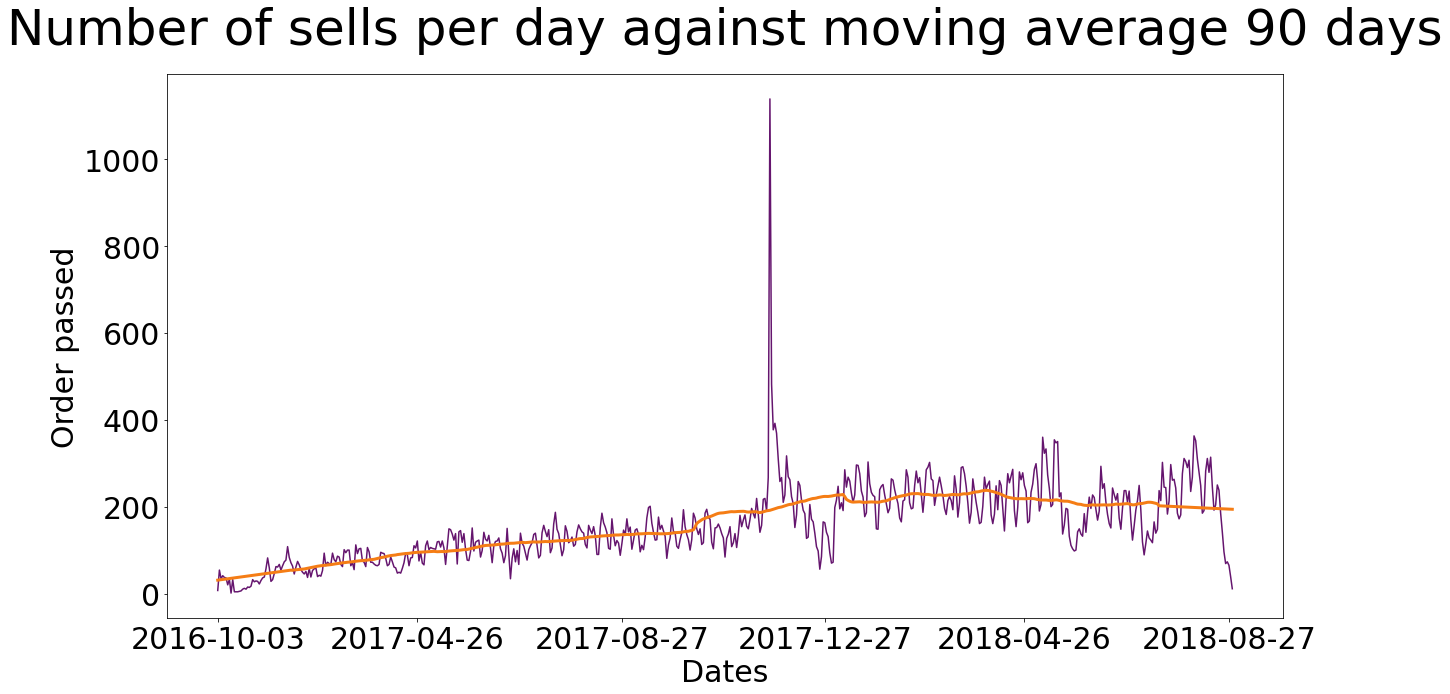

In [79]:
# Plots the trend(moving average of 90 days) against the number of sells
# of the individual days

fig, ax1 = plt.subplots(figsize=(20, 10))

sns.lineplot(
    data=purchase_timestamp_df,
    x=purchase_timestamp_df.index,
    y='order_purchase_timestamp_formatted',
    color=sns.color_palette('inferno')[1],
    ax=ax1)

sns.lineplot(
    data=purchase_timestamp_df,
    x=purchase_timestamp_df.index,
    y='trend_90',
    ax=ax1,
    color=sns.color_palette('inferno')[4],
    lw=3)

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))

ax1.tick_params(labelsize=30)

ax1.set_xlabel('Dates', fontsize=text_size)
ax1.set_ylabel('Order passed', fontsize=text_size)

plt.title('Number of sells per day against moving average 90 days',
          fontsize=title_size, pad=30)

plt.show();


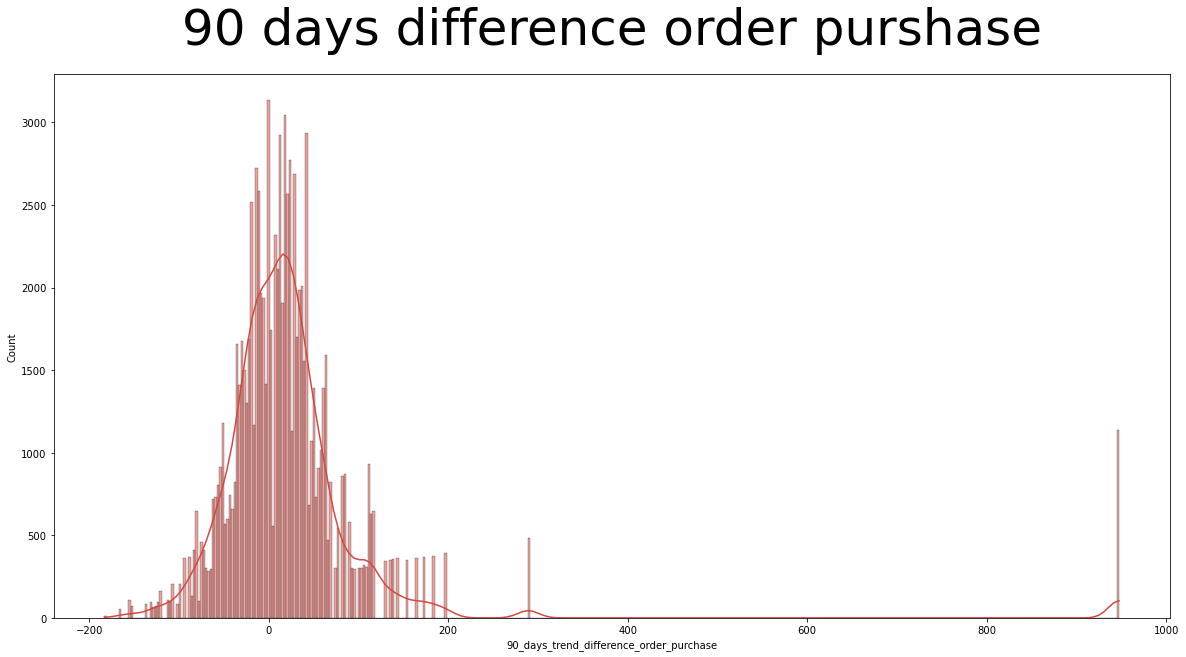

In [80]:
# Reset index and renames columns

purchase_timestamp_df = \
    purchase_timestamp_df\
    .reset_index()\
    .rename({'index': 'order_purchase_timestamp_formatted',
             'order_purchase_timestamp_formatted':
             'order_purchase_timestamp_formatted_count'}, axis=1)

# Computes the difference between the moving average and the day sells

purchase_timestamp_df['90_days_trend_difference_order_purchase'] = \
    purchase_timestamp_df['order_purchase_timestamp_formatted_count'] \
    - purchase_timestamp_df['trend_90']

# Merges the new features on merged_df

merged_df = \
    pd.merge(merged_df,
             purchase_timestamp_df,
             how='left',
             on='order_purchase_timestamp_formatted')

# Underlines the outliers presency

fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(
    merged_df['90_days_trend_difference_order_purchase'],
    kde=True,
    color=sns.color_palette('inferno')[3])

plt.title('90 days difference order purshase',
          fontsize=title_size, pad=30)

plt.show();


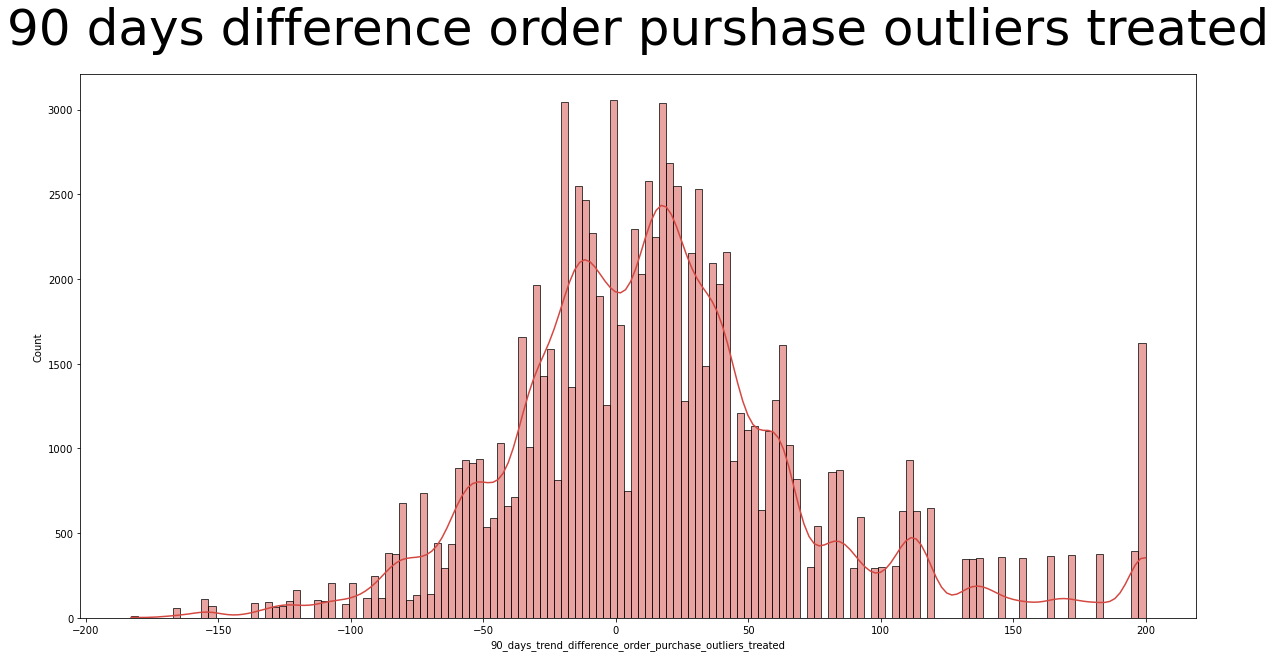

In [81]:
# Resolves the distance issue in bringing outliers to the second maximum value

merged_df['90_days_trend_difference_order_purchase_outliers_treated'] = \
    merged_df['90_days_trend_difference_order_purchase']\
    .apply(lambda x: 200 if x > 282 else x)

# Plots the above applied changes

fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(
    merged_df['90_days_trend_difference_order_purchase_outliers_treated'],
    kde=True,
    color=sns.color_palette('inferno')[3]
)

plt.title('90 days difference order purshase outliers treated',
          fontsize=title_size, pad=30)

plt.show();


    Have also been considered upon the RFM : the satisfaction (through review scores)and the sensitivity of basket orders (through order_id_item_max) 

In [82]:
# Creates a dataframe with 1 sample per individual and aggregates the needed
# features e.g RFM + staisfaction, sensitivity to basket,
# sensitivity to events, delivery advance-lateness +
# order_purchase_timestamp_max for the stability investigation

merged_df_reworked = \
    merged_df.groupby('customer_unique_id')\
    .agg({'order_id': ['count'],
          'negative_recency_days': ['max'],
          'payment_value_sum_per_order': ['sum', 'mean'],
          'review_score': ['mean'],
          'order_item_id_max': ['mean'],
          '90_days_trend_difference_order_purchase_outliers_treated': ['mean'],
          'advance_delay_delivery': ['mean'],
          'order_purchase_timestamp': ['max', 'min'],
          'seller_id': [pd.Series.mode]})\
    .reset_index()


merged_df_reworked.columns = pd.Index(['customer_unique_id'])\
    .append(merged_df_reworked.columns[1:].get_level_values(0)
            + '_'
            + merged_df_reworked.columns[1:].get_level_values(1))


# Rename the features

merged_df_reworked = \
    merged_df_reworked.rename({
        'negative_recency_days_max': 'Recency',
        'order_id_count': 'Frequency',
        'payment_value_sum_per_order_sum': 'Monetary_Sum',
        'payment_value_sum_per_order_mean': 'Monetary_Mean',
        'review_score_mean': 'Satisfaction',
        'order_item_id_max_mean': 'Basket',
        '90_days_trend_difference_order_purchase_outliers_treated_mean':
        'Event',
        'advance_delay_delivery_mean': 'Timing'}, axis=1)

# Displays the engineered and selected features

merged_df_reworked.head()


,customer_unique_id,Frequency,Recency,Monetary_Sum,Monetary_Mean,Satisfaction,Basket,Event,Timing,order_purchase_timestamp_max,order_purchase_timestamp_min,seller_id_mode
0,0000366f3b9a7992bf8c76cfdf3221e2,1,-1426,141.90,141.90,5.0,1.0,58.294444,-5.0,2018-05-10 10:56:27,2018-05-10 10:56:27,da8622b14eb17ae2831f4ac5b9dab84a
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,-1429,27.19,27.19,4.0,1.0,144.738889,-5.0,2018-05-07 11:11:27,2018-05-07 11:11:27,138dbe45fc62f1e244378131a6801526
2,0000f46a3911fa3c0805444483337064,1,-1852,86.22,86.22,3.0,1.0,14.466667,-2.0,2017-03-10 21:05:03,2017-03-10 21:05:03,3d871de0142ce09b7081e2b9d1733cb1
3,0000f6ccb0745a6a4b88665a16c9f078,1,-1636,43.62,43.62,4.0,1.0,-28.505556,-12.0,2017-10-12 20:29:41,2017-10-12 20:29:41,ef506c96320abeedfb894c34db06f478
4,0004aac84e0df4da2b147fca70cf8255,1,-1603,196.89,196.89,5.0,1.0,-4.516667,-8.0,2017-11-14 19:45:42,2017-11-14 19:45:42,70a12e78e608ac31179aea7f8422044b


<center><h6>Statistics

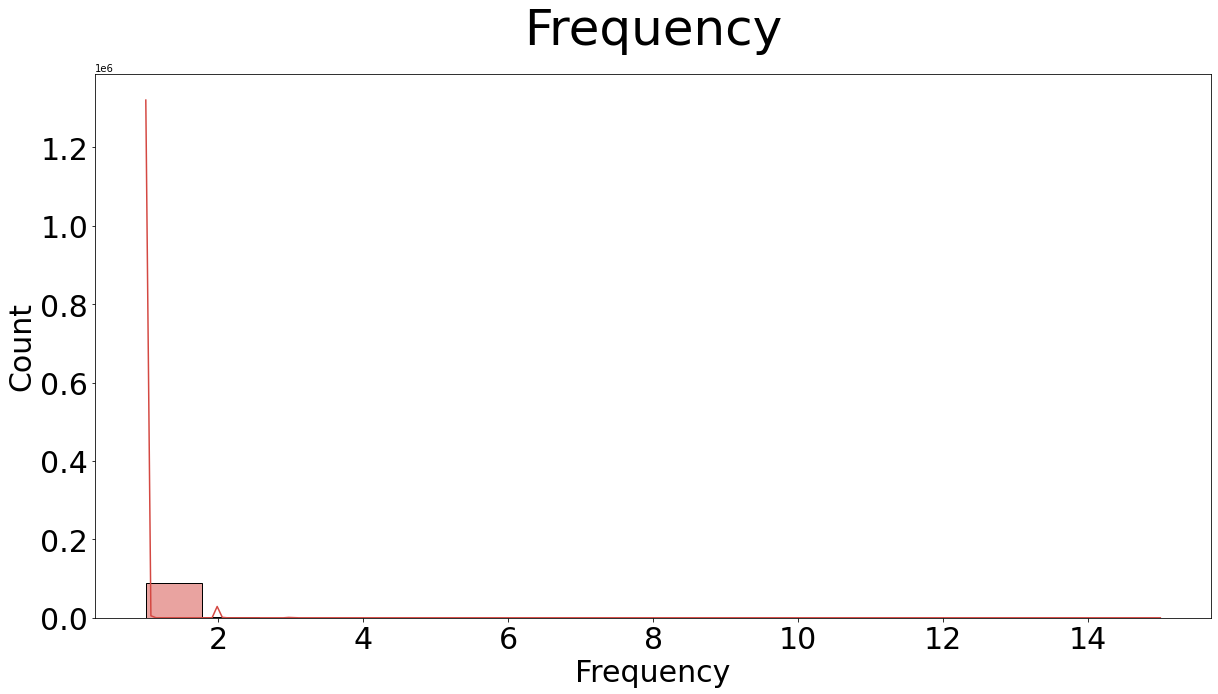

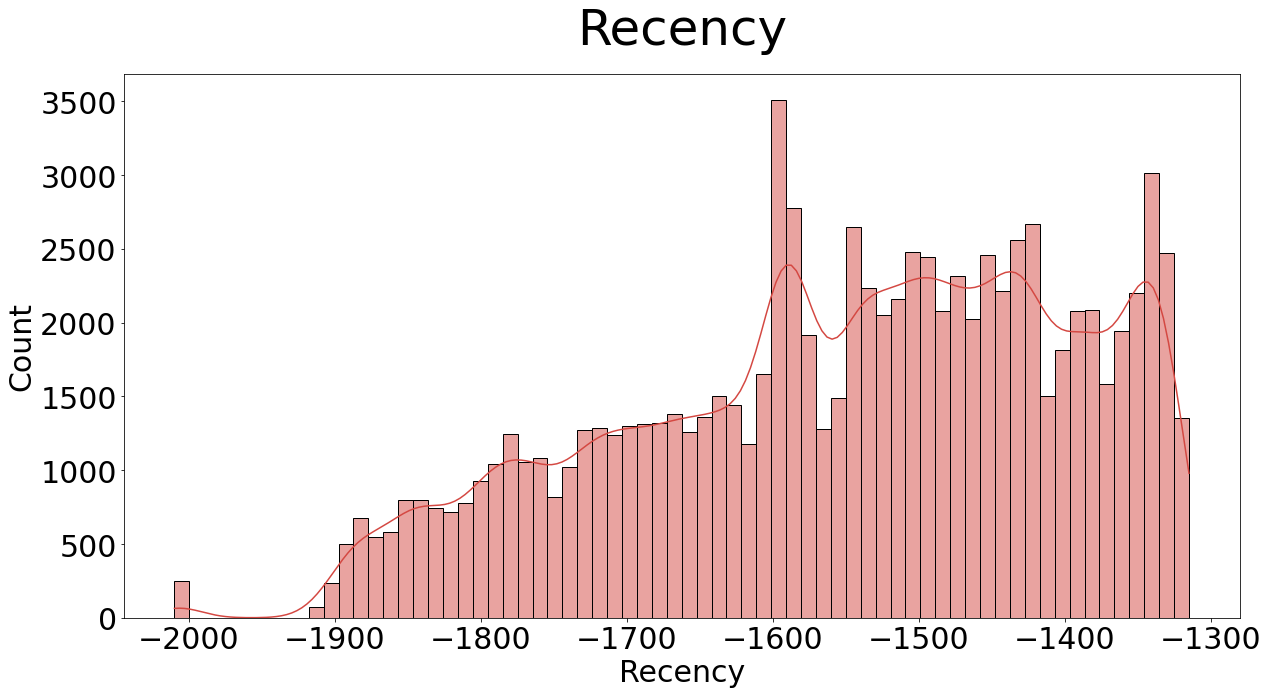

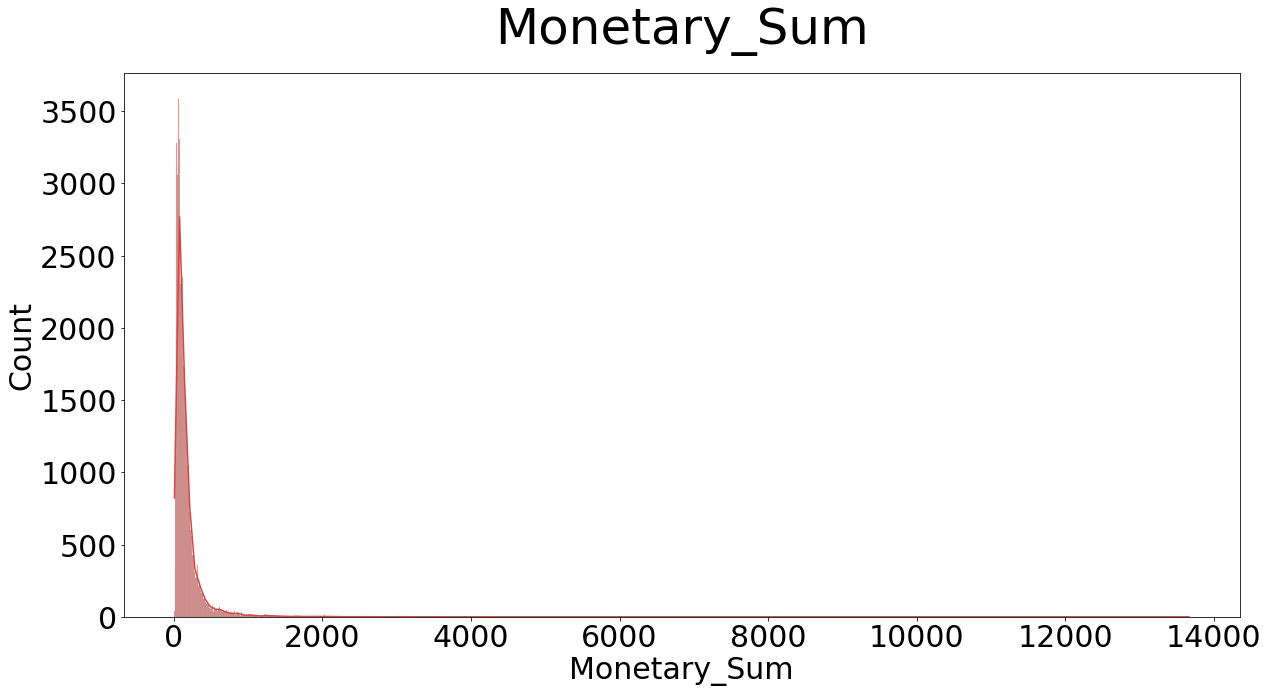

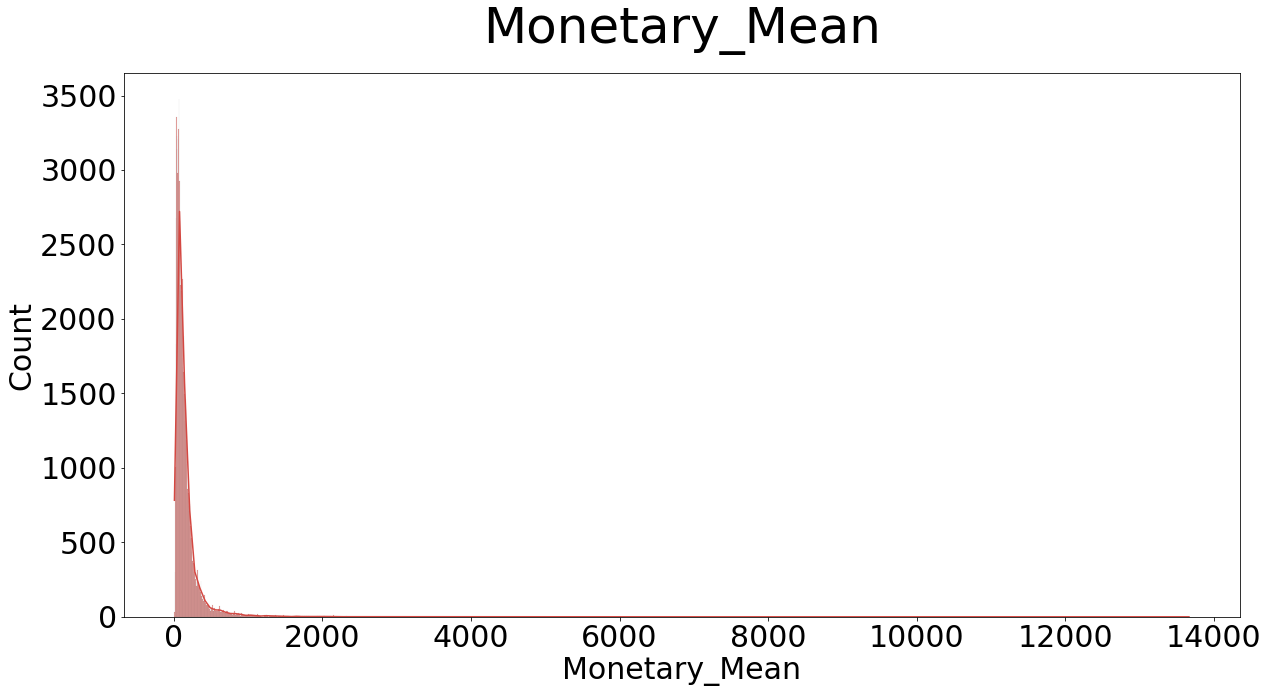

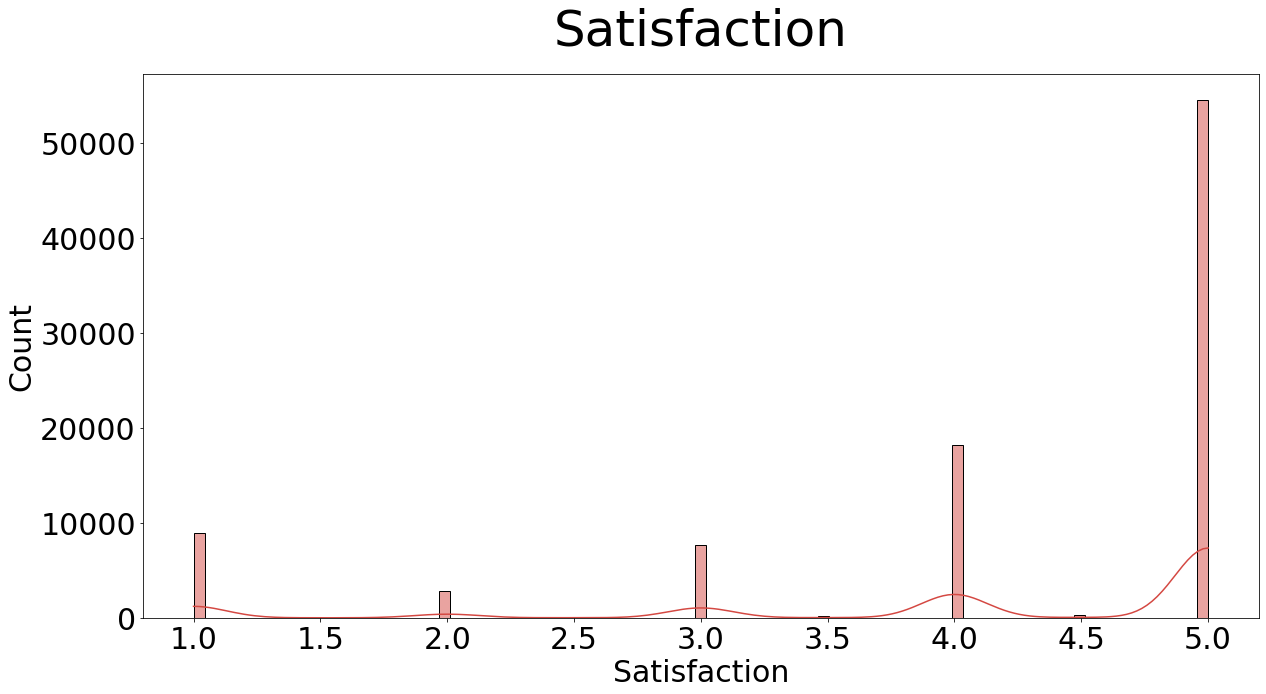

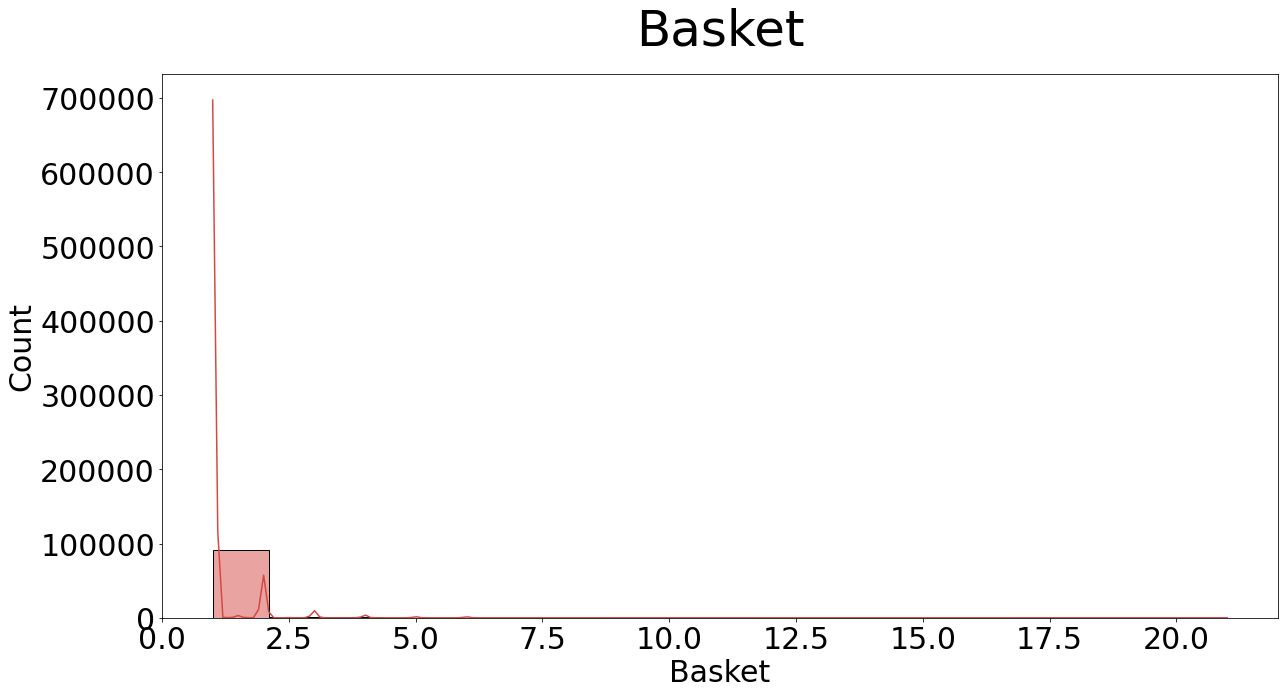

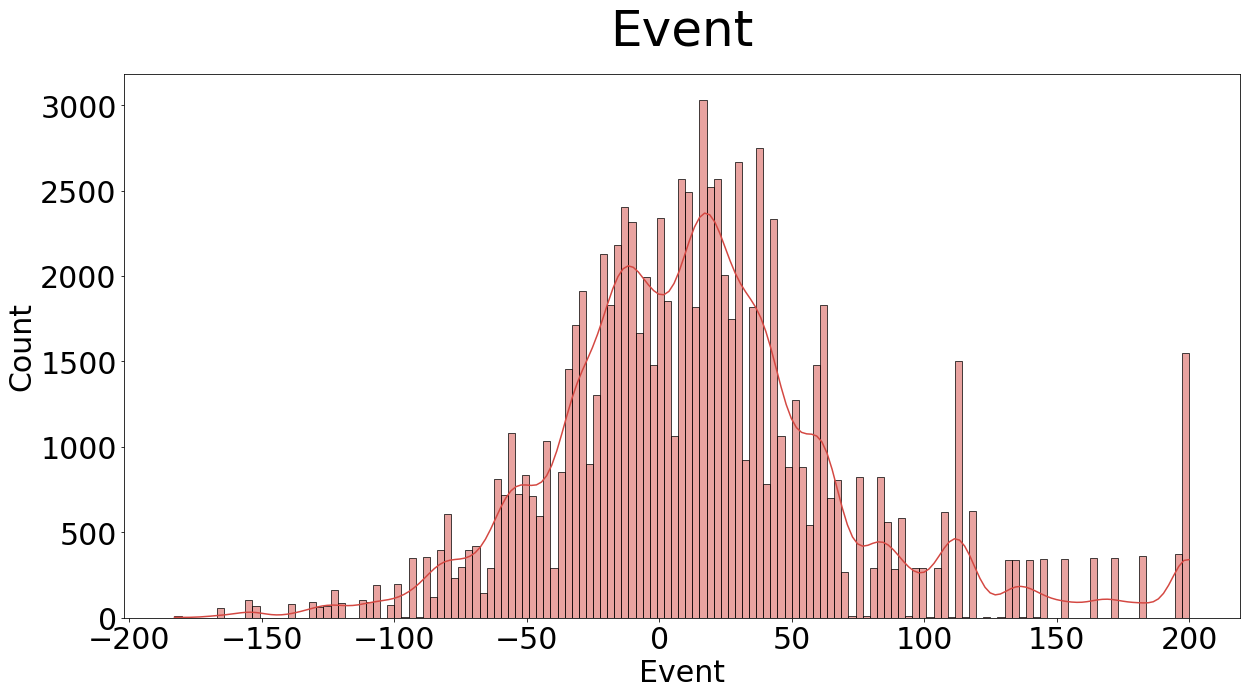

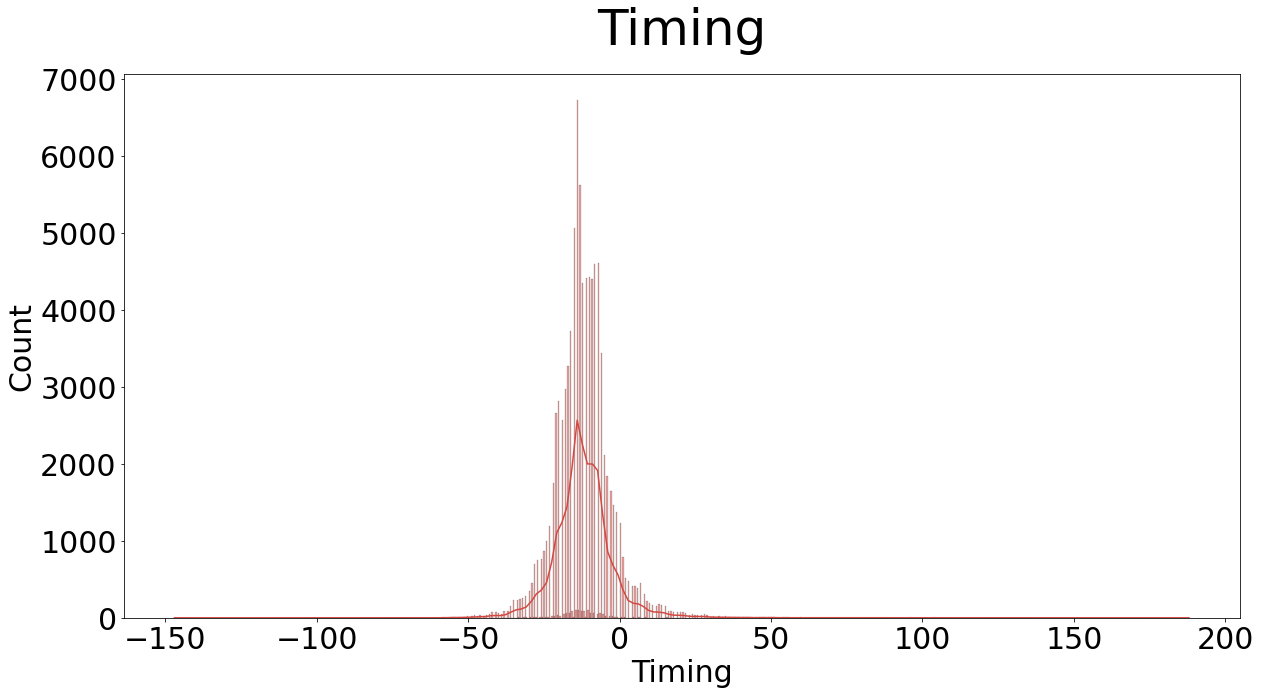

In [83]:
# Plots interesting univariates features of merged_df_reworked

for i in merged_df_reworked.iloc[:, 1:9].columns:

    fig, ax = plt.subplots(figsize=(20, 10))
    sns.histplot(data=merged_df_reworked,
                 x=i,
                 kde = True,
                 color=sns.color_palette('inferno')[3],
                 ax=ax)

    ax.tick_params(labelsize=tick_size)
    ax.set_xlabel('{}'.format(i), fontsize=text_size)
    ax.set_ylabel('Count', fontsize=text_size)
    plt.title('{}'.format(i), fontsize=title_size, pad=30)

    plt.show()

plt.show();


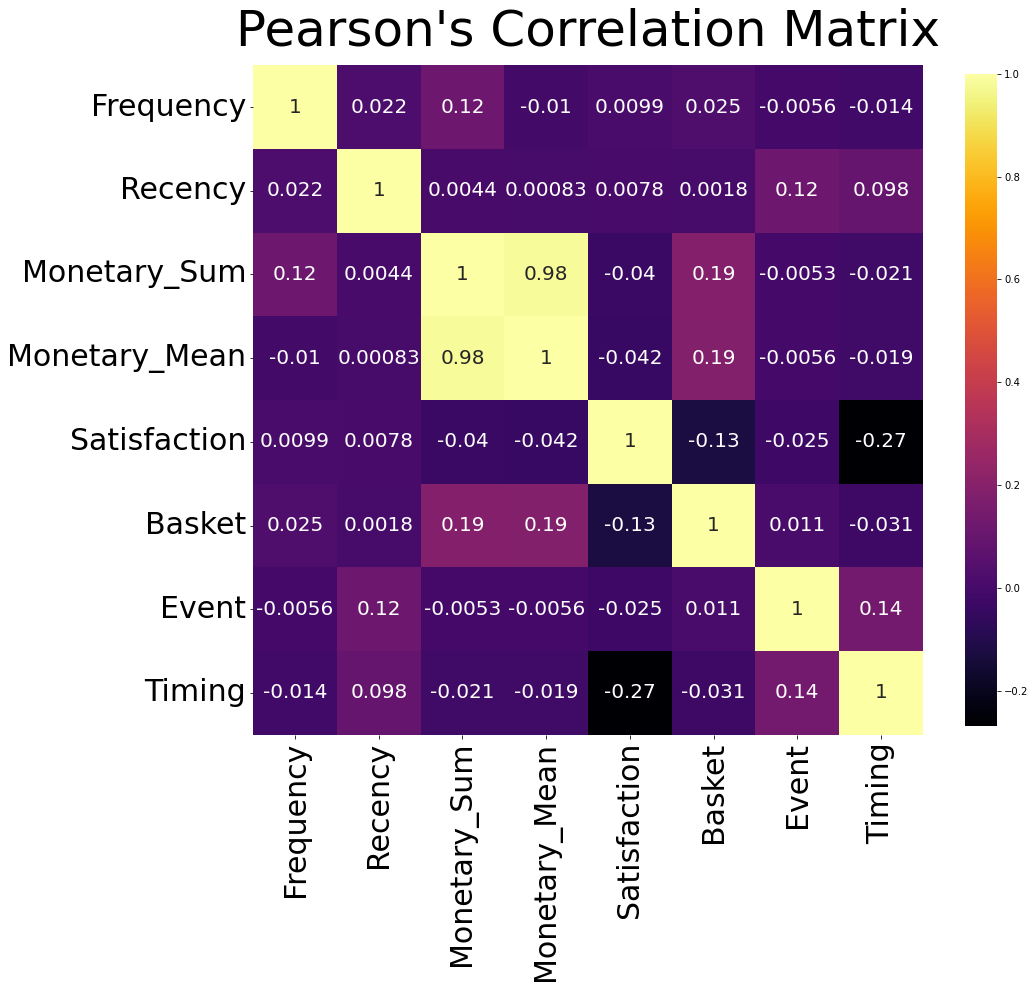

In [84]:
# Plots Pearson's Correlation Matrix

fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(
    data=merged_df_reworked.iloc[:, 1:9].corr(),
    annot = True,
    square = True,
    cmap=sns.color_palette('inferno', as_cmap = True),
    annot_kws={'size': 20},
    cbar_kws={'shrink': 0.8})

ax.tick_params(labelsize=tick_size)
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=0)

plt.title('Pearson\'s Correlation Matrix', pad=20, fontsize=title_size)
plt.show();


<center><h6>CSV Export

In [85]:
# Exports the dataframe

merged_df_reworked\
    .to_csv(r'F:\Data\Projet 5\Livrables\cleaned_data', index = False)
